In [ ]:
import pandas as pd

file_path = '/content/bank-nifty-1m-data.csv'
df = pd.read_csv(file_path)

print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nFirst 5 Rows:")
print(df.head())
print("\nLast 5 Rows:")
print(df.tail())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Stats:")
print(df.describe())

# Build datetime column
df.columns = df.columns.str.lower()
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
df.set_index('datetime', inplace=True)

if 'datetime' in df.columns:
    print("\nDate Range:")
    print("From:", df.index.min())
    print("To:  ", df.index.max())

Shape: (851392, 7)

Columns:
['Instrument', 'Date', 'Time', 'Open', 'High', 'Low', 'Close']

Data Types:
Instrument     object
Date           object
Time           object
Open          float64
High          float64
Low           float64
Close         float64
dtype: object

First 5 Rows:
  Instrument        Date     Time     Open      High       Low     Close
0  Banknifty  09-01-2015  9:15:00  18845.9  18845.90  18801.70  18801.70
1  Banknifty  09-01-2015  9:16:00  18801.7  18806.05  18790.20  18794.65
2  Banknifty  09-01-2015  9:17:00  18796.0  18829.00  18794.65  18827.30
3  Banknifty  09-01-2015  9:18:00  18827.3  18864.00  18827.30  18862.10
4  Banknifty  09-01-2015  9:19:00  18862.1  18862.10  18843.55  18849.25

Last 5 Rows:
       Instrument        Date      Time      Open      High       Low  \
851387  Banknifty  22-03-2024  14:36:00  46876.55  46885.10  46874.60   
851388  Banknifty  22-03-2024  14:37:00  46883.45  46895.95  46879.25   
851389  Banknifty  22-03-2024  14:38:00  

In [ ]:

df_jan_17 = df.loc['2024-01-17']

print(df_jan_17.head())
print(df_jan_17.tail())

                    instrument        date     time      open      high  \
datetime                                                                  
2024-01-17 09:15:00  Banknifty  17-01-2024  9:15:00  46573.95  46890.00   
2024-01-17 09:16:00  Banknifty  17-01-2024  9:16:00  46808.10  46953.30   
2024-01-17 09:17:00  Banknifty  17-01-2024  9:17:00  46901.70  47019.05   
2024-01-17 09:18:00  Banknifty  17-01-2024  9:18:00  47010.10  47083.50   
2024-01-17 09:19:00  Banknifty  17-01-2024  9:19:00  47073.75  47127.90   

                         low     close  
datetime                                
2024-01-17 09:15:00  46534.3  46815.05  
2024-01-17 09:16:00  46776.7  46908.25  
2024-01-17 09:17:00  46886.1  47019.05  
2024-01-17 09:18:00  46999.8  47050.25  
2024-01-17 09:19:00  47029.4  47114.15  
                    instrument        date      time      open      high  \
datetime                                                                   
2024-01-17 15:25:00  Banknifty  17-

=== BANKNIFTY – 17 JAN 2024 (MANIPULATION ANALYSIS) ===
OPEN PRICE (09:15): 46573.95
PATCH I END PRICE (11:46): 46382.35
PATCH II START PRICE (11:49): 46383.20
CLOSING PRICE (15:30): 46083.50
DAY'S HIGH: 47212.75
DAY'S LOW: 45979.60


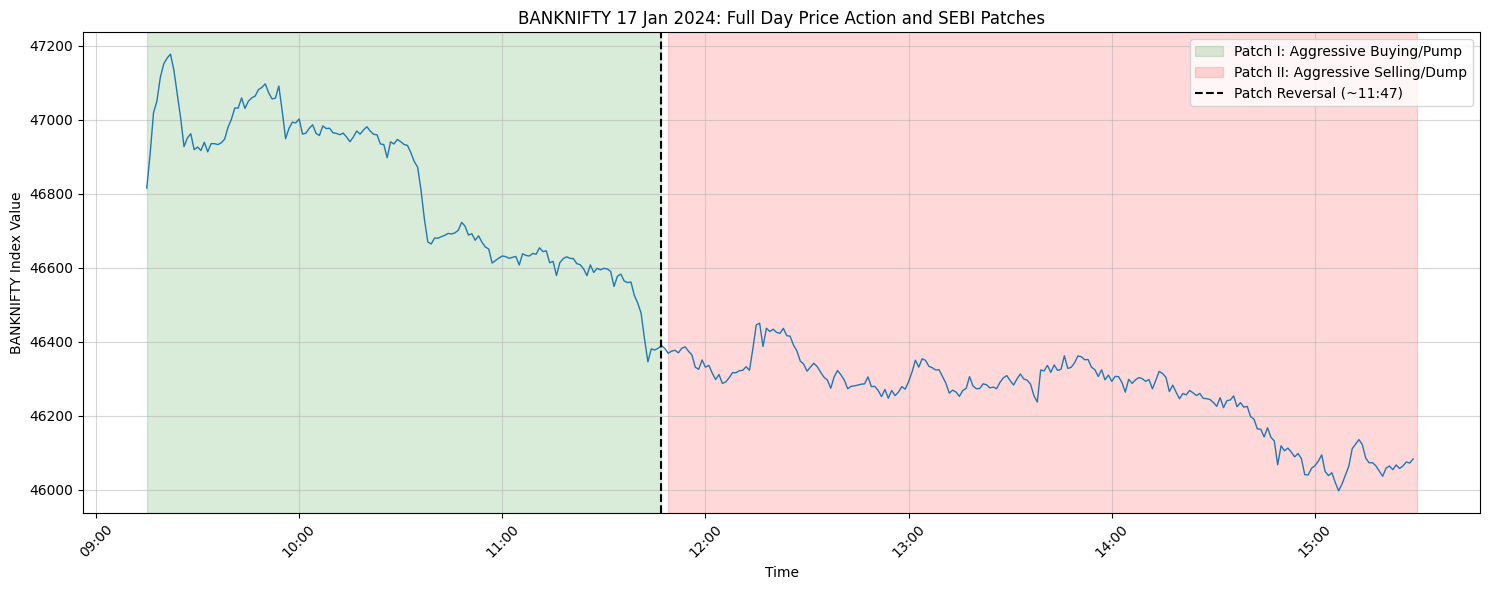

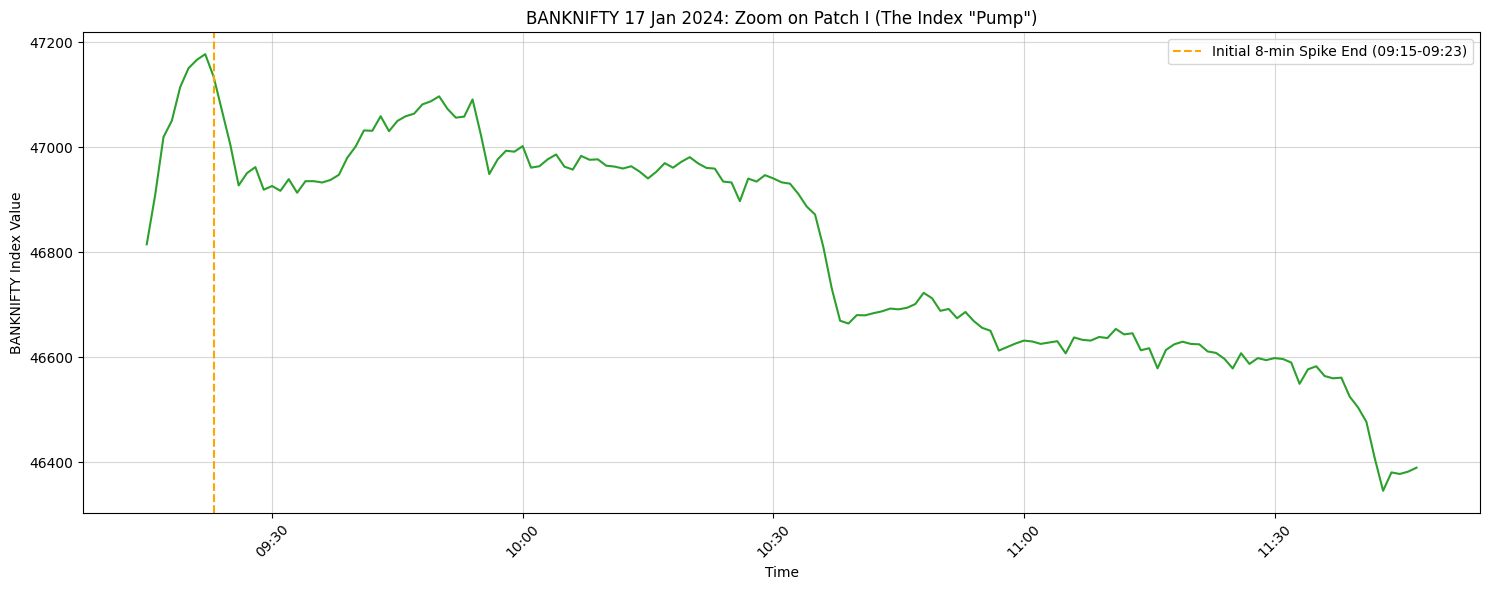

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

day = df_jan_17.copy()

patch_i_close = day.loc['2024-01-17 11:46:00', 'close'].item()
patch_ii_open = day.loc['2024-01-17 11:49:00', 'open'].item()

print("=== BANKNIFTY – 17 JAN 2024 (MANIPULATION ANALYSIS) ===")
print(f"OPEN PRICE (09:15): {day['open'].iloc[0]:.2f}")
print(f"PATCH I END PRICE (11:46): {patch_i_close:.2f}")
print(f"PATCH II START PRICE (11:49): {patch_ii_open:.2f}")
print(f"CLOSING PRICE (15:30): {day['close'].iloc[-1]:.2f}")
print(f"DAY'S HIGH: {day['high'].max():.2f}")
print(f"DAY'S LOW: {day['low'].min():.2f}")

plt.figure(figsize=(15, 6))
plt.plot(day.index, day['close'], color='tab:blue', linewidth=1)
plt.title('BANKNIFTY 17 Jan 2024: Full Day Price Action and SEBI Patches')
plt.xlabel('Time')
plt.ylabel('BANKNIFTY Index Value')
plt.grid(True, alpha=0.5)

plt.axvspan(pd.to_datetime('2024-01-17 09:15'), pd.to_datetime('2024-01-17 11:47'), color='green', alpha=0.15, label='Patch I: Aggressive Buying/Pump')
plt.axvspan(pd.to_datetime('2024-01-17 11:49'), pd.to_datetime('2024-01-17 15:30'), color='red', alpha=0.15, label='Patch II: Aggressive Selling/Dump')
plt.axvline(pd.to_datetime('2024-01-17 11:47'), color='black', linestyle='--', linewidth=1.5, label='Patch Reversal (~11:47)')

plt.legend(loc='upper right')
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
day_patch_i = day.loc['2024-01-17 09:15':'2024-01-17 11:47']
plt.plot(day_patch_i.index, day_patch_i['close'], color='tab:green', linewidth=1.5)
plt.title('BANKNIFTY 17 Jan 2024: Zoom on Patch I (The Index "Pump")')
plt.xlabel('Time')
plt.ylabel('BANKNIFTY Index Value')
plt.grid(True, alpha=0.5)

plt.axvline(pd.to_datetime('2024-01-17 09:23'), color='orange', linestyle='--', linewidth=1.5, label='Initial 8-min Spike End (09:15-09:23)')

plt.legend(loc='upper right')
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analysis Results:
         date  patch_i_end  patch_ii_start  patch_ii_close  \
0  2023-08-31     44068.05        44017.70             NaN   
1  2023-09-13     45638.80        45633.50             NaN   
2  2023-09-20     45429.70        45416.70             NaN   
3  2023-09-28     44489.45        44497.10             NaN   
4  2023-10-18     43930.95        43939.90             NaN   
5  2023-10-26     42194.20        42178.30             NaN   
6  2023-12-06     46898.15        46902.55             NaN   
7  2024-01-03     47740.30        47763.65             NaN   
8  2024-01-17     46382.35        46369.05             NaN   
9  2024-03-06     47966.15        47999.00             NaN   

   change_i_to_ii (%)  change_ii_to_close (%)  vol_patch_i  vol_patch_ii  
0           -0.114255                     NaN     0.006526      0.005289  
1           -0.011613                     NaN     0.005694      0.005670  
2           -0.028616                     NaN     0.004447      0.004277  

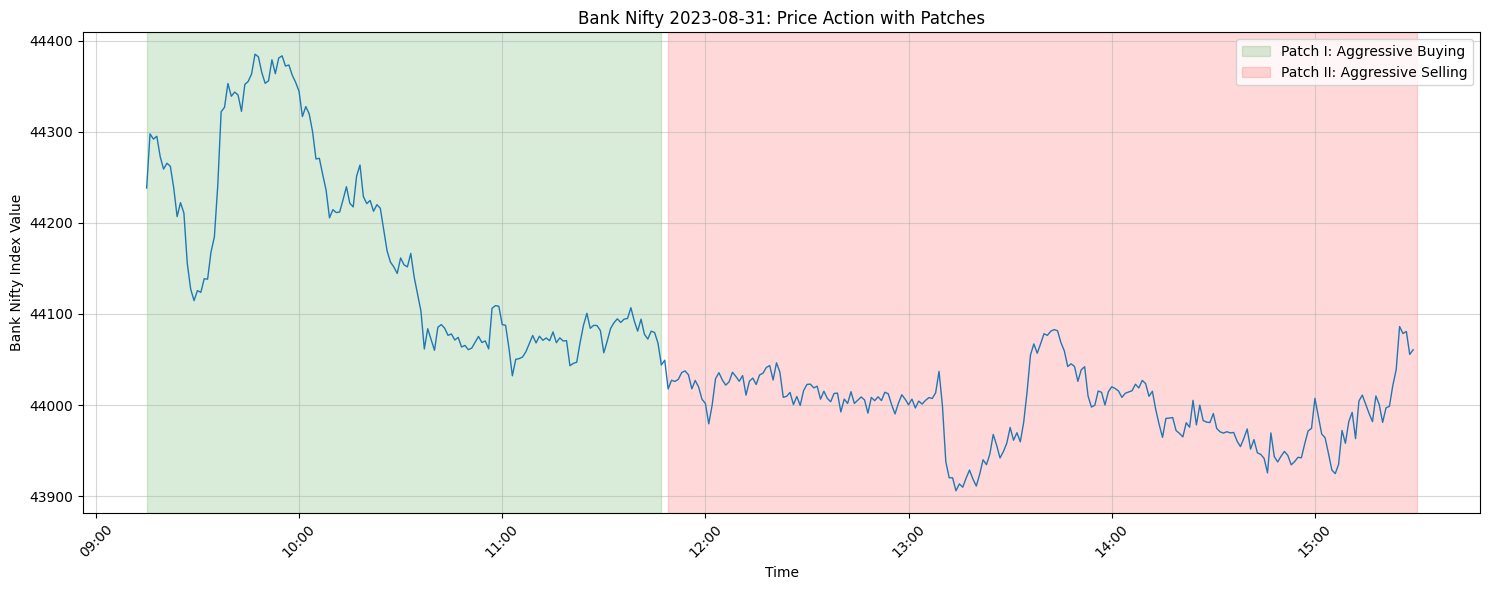

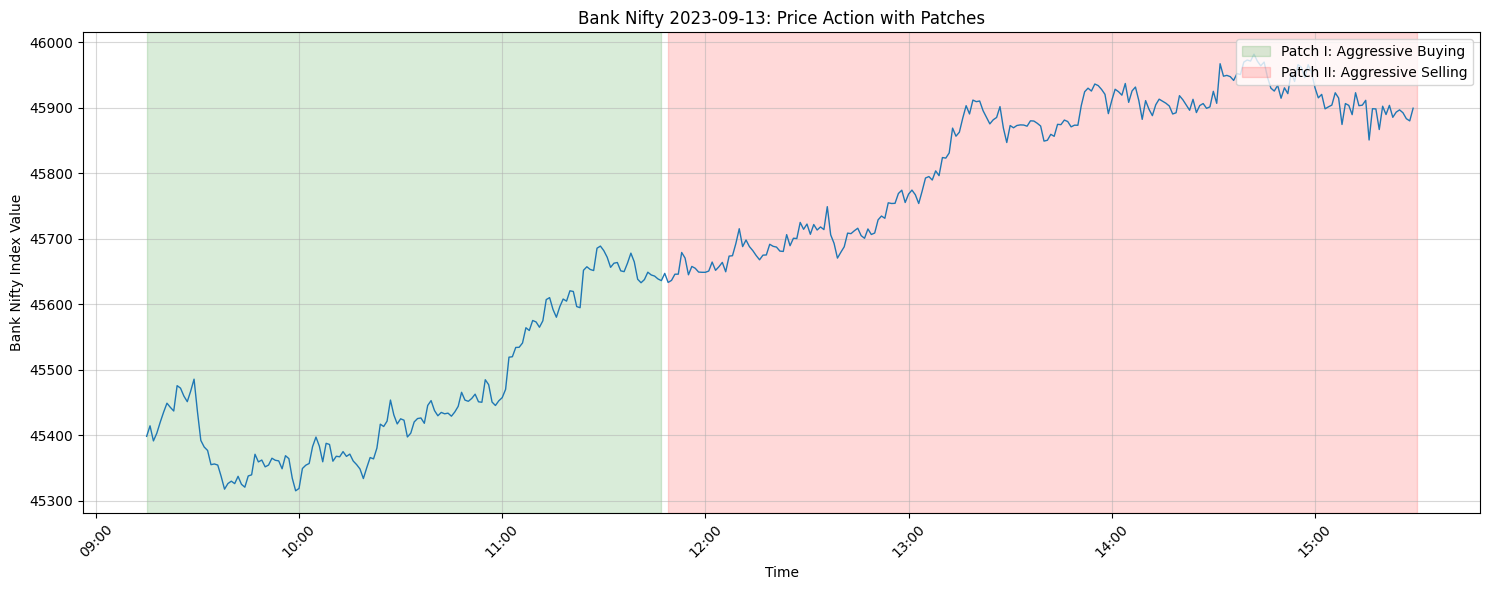

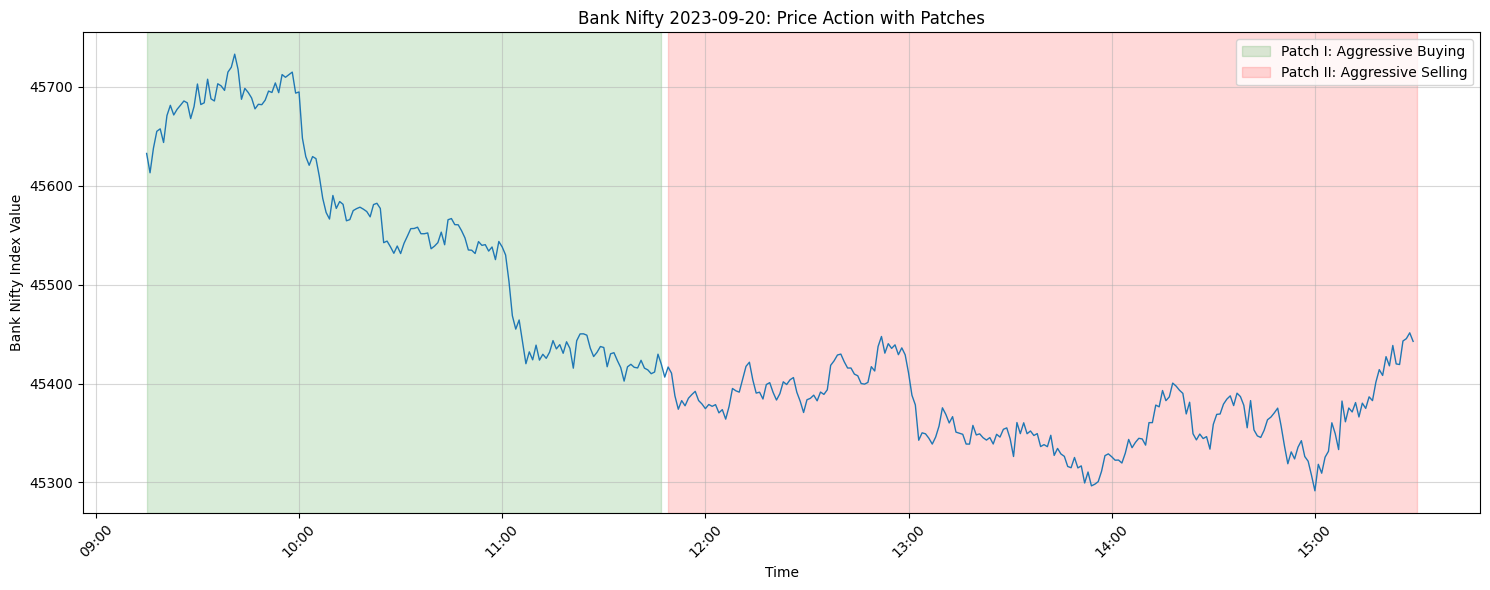

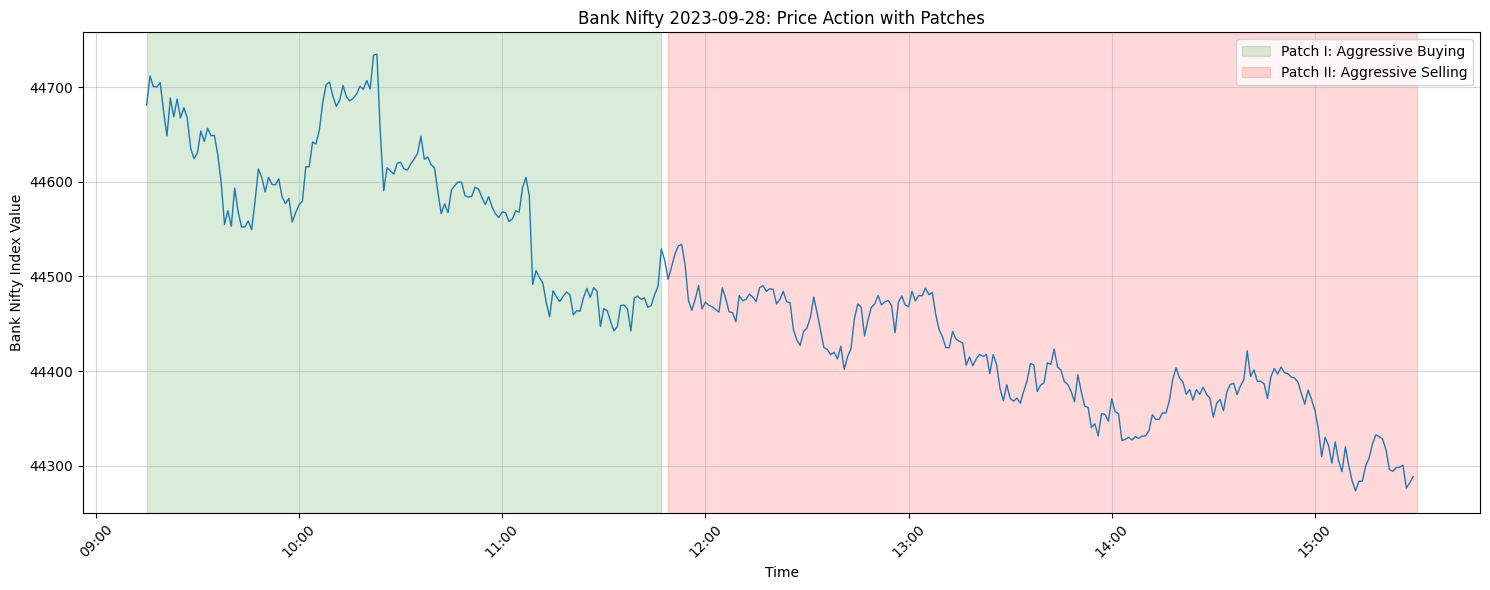

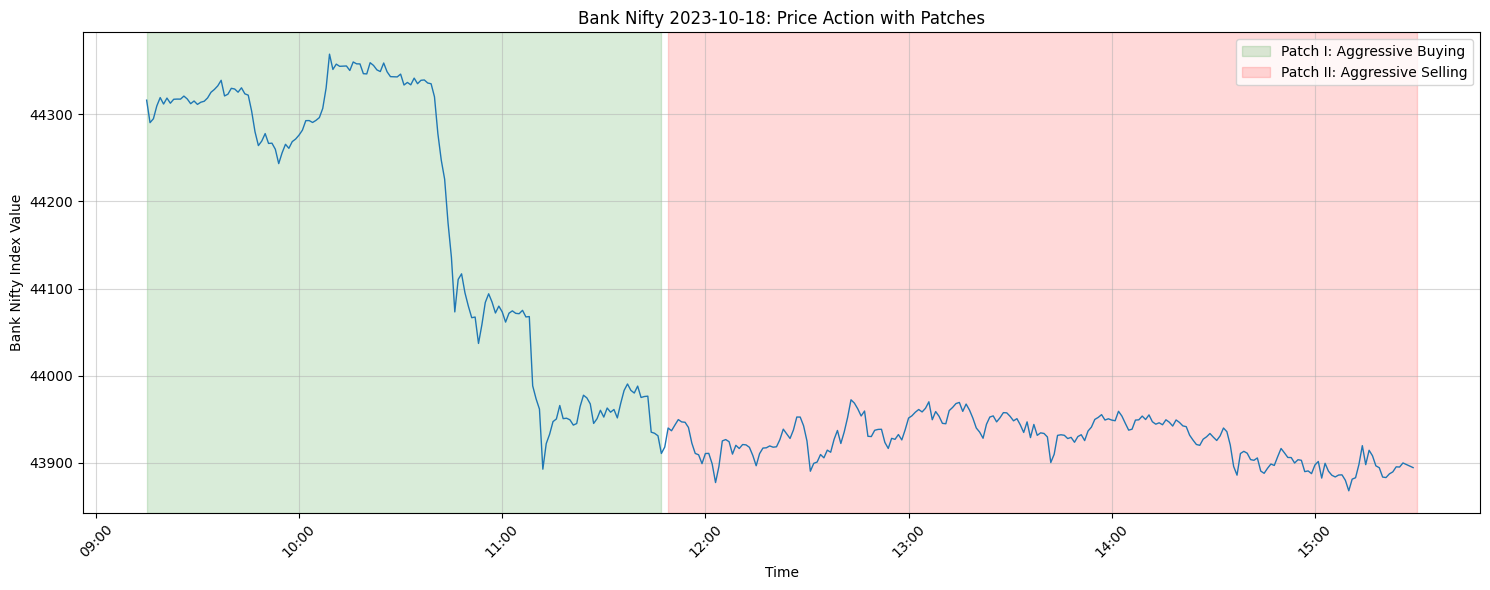

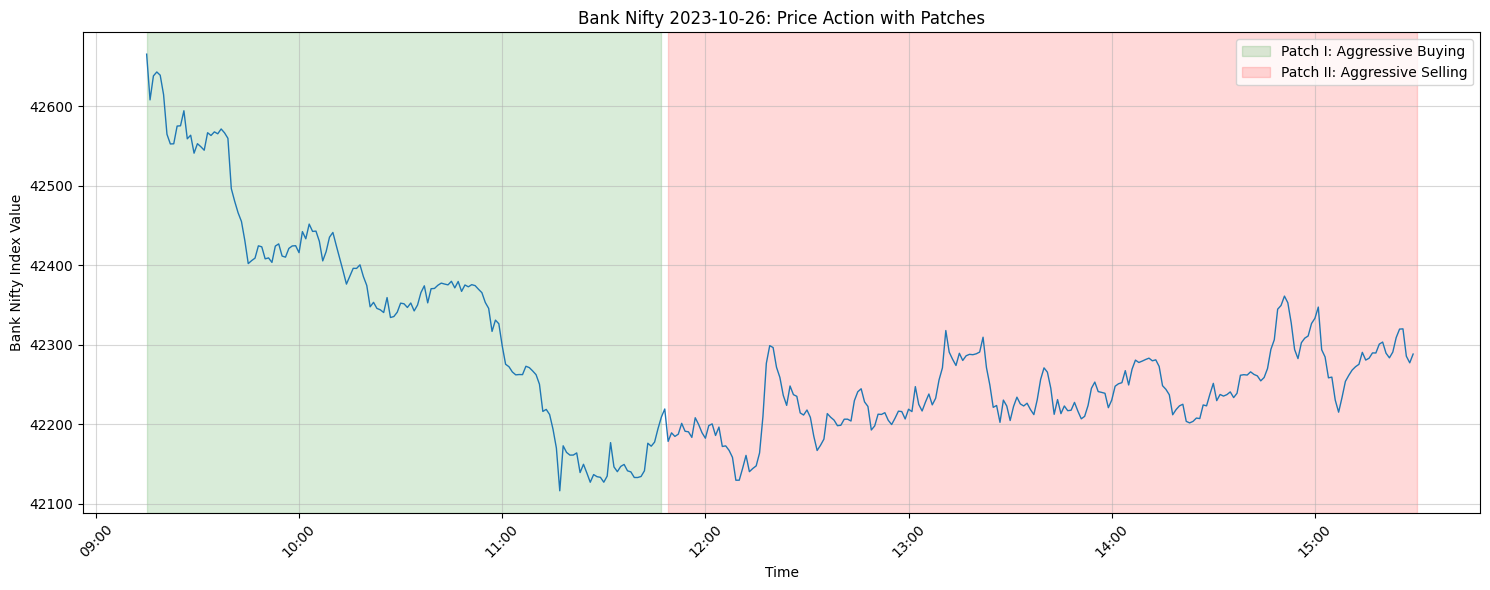

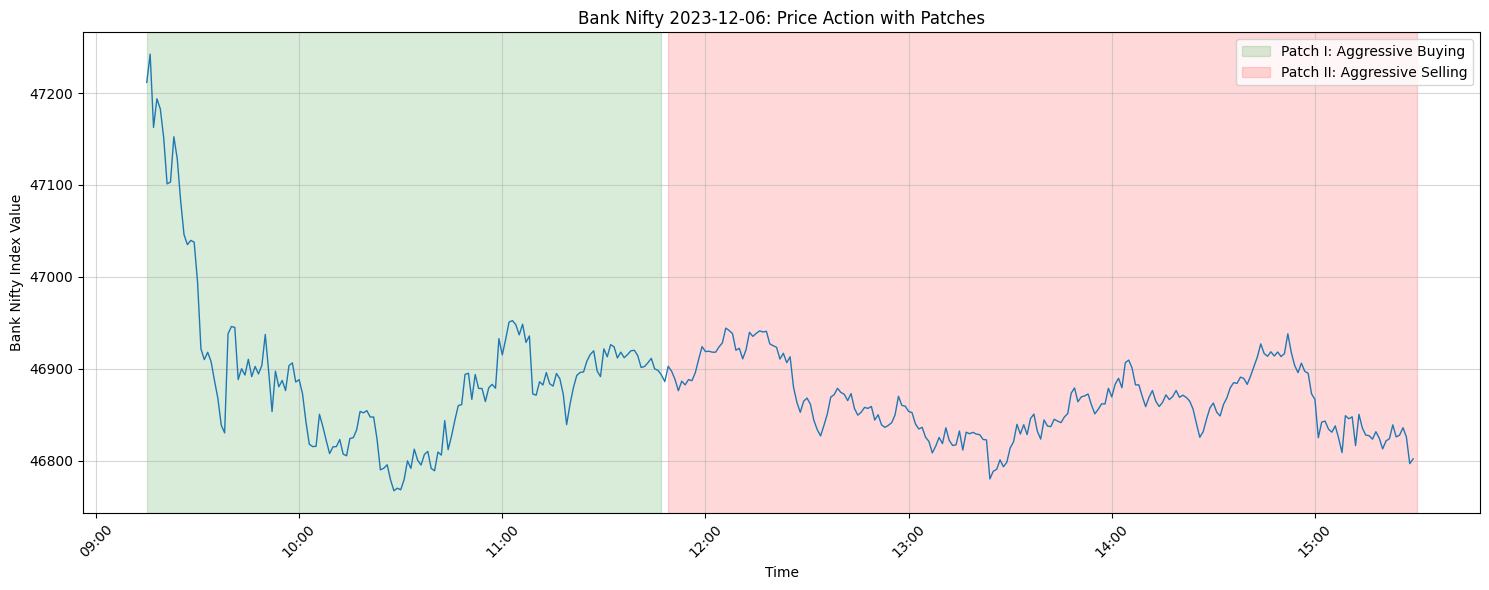

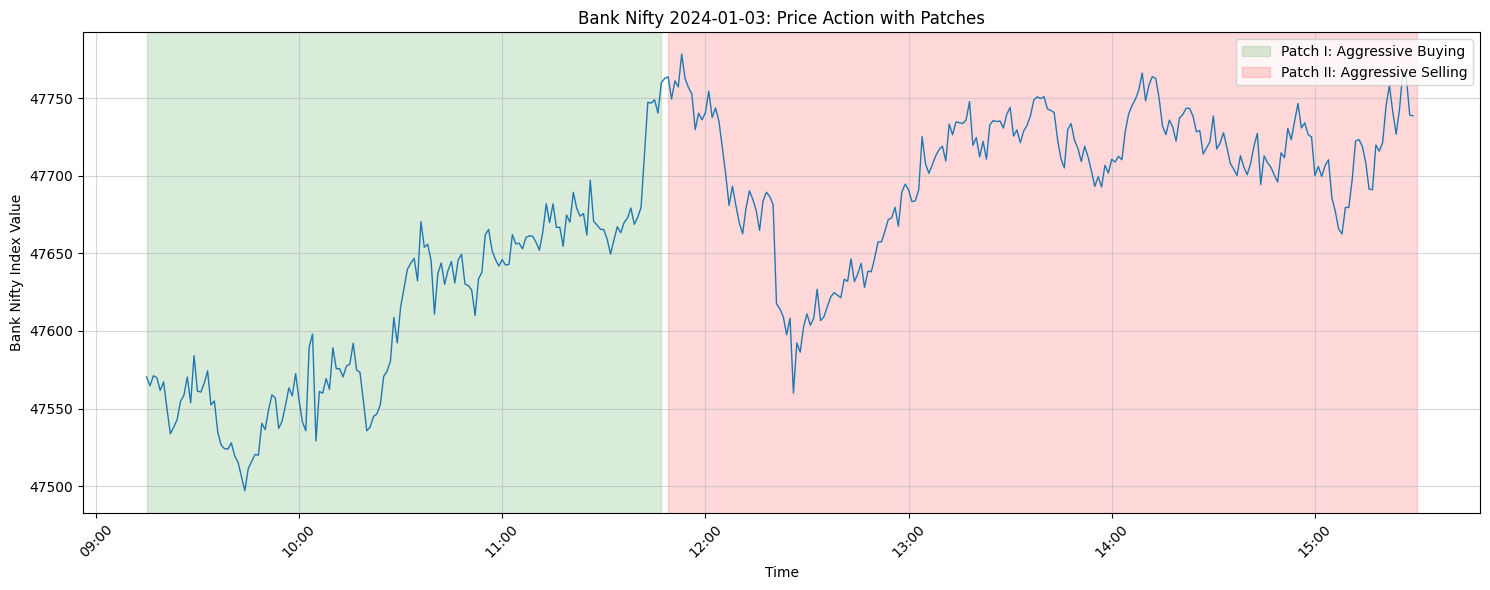

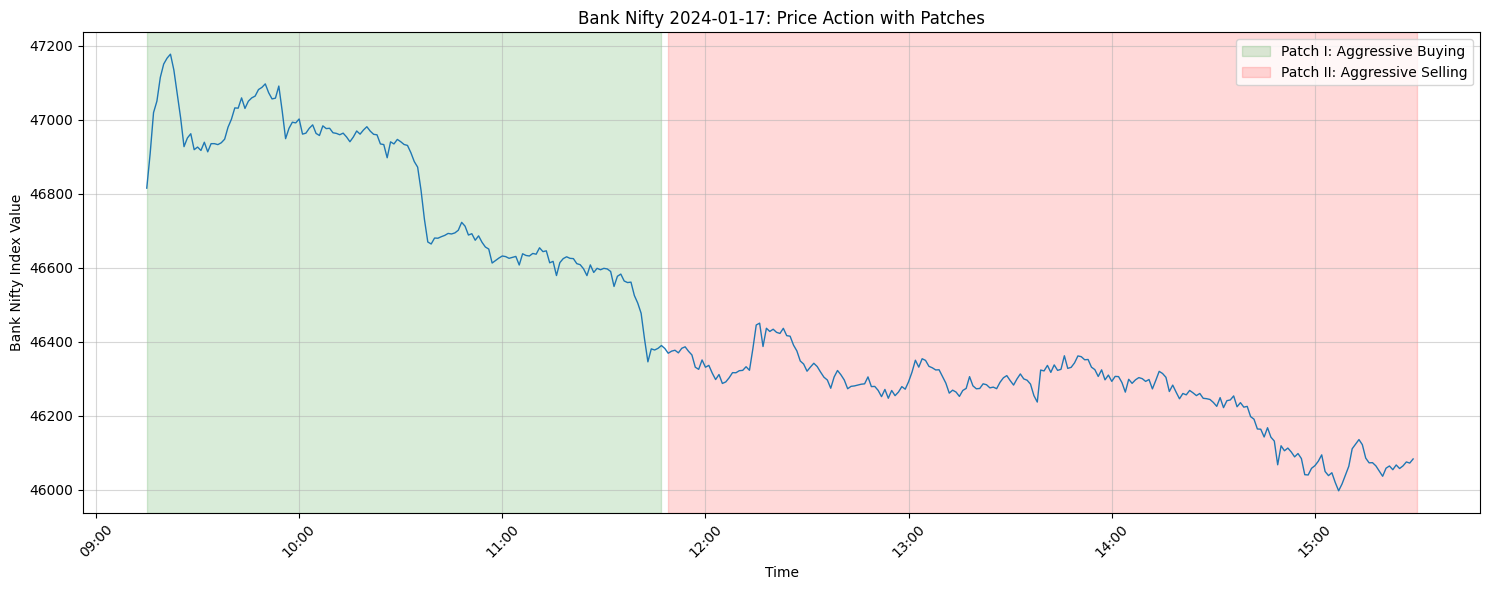

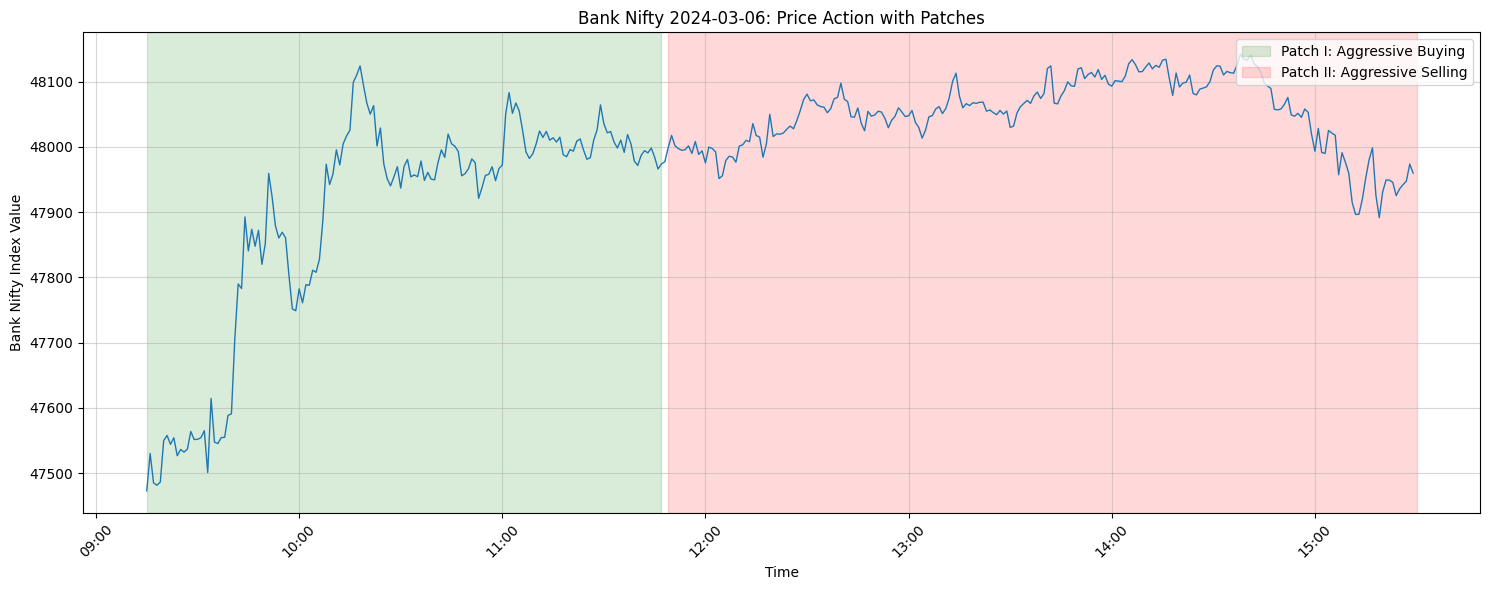

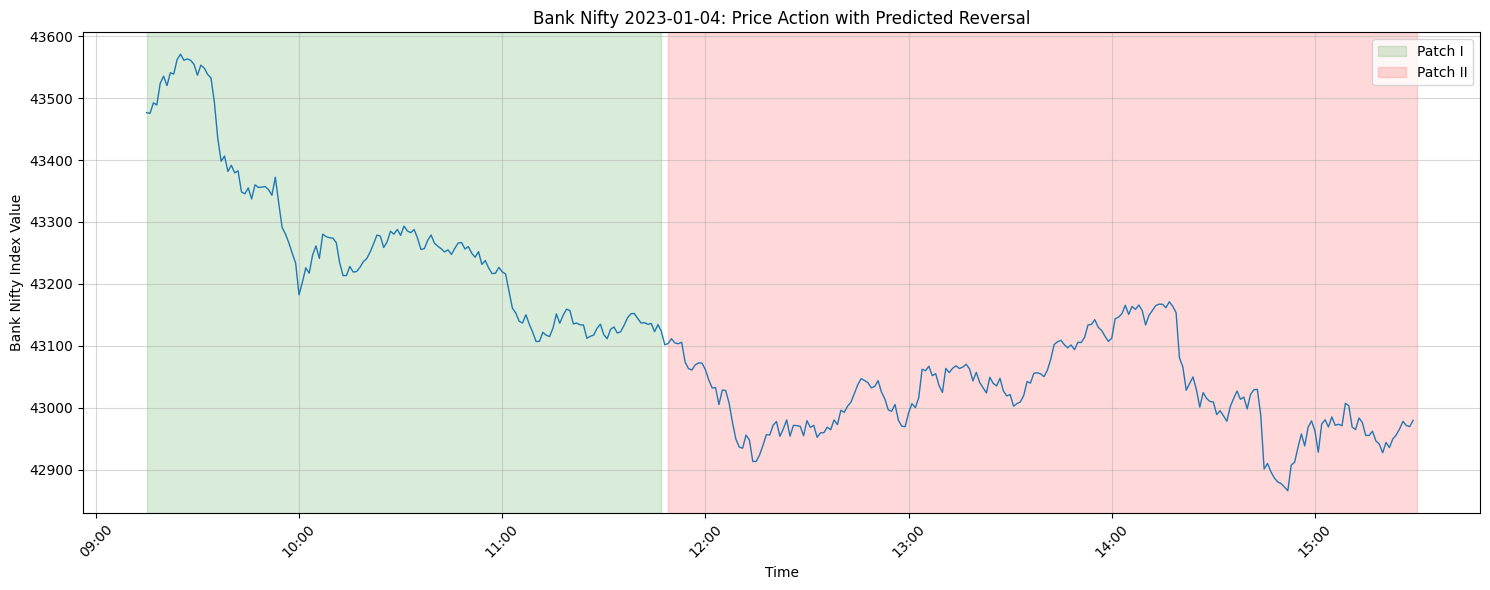

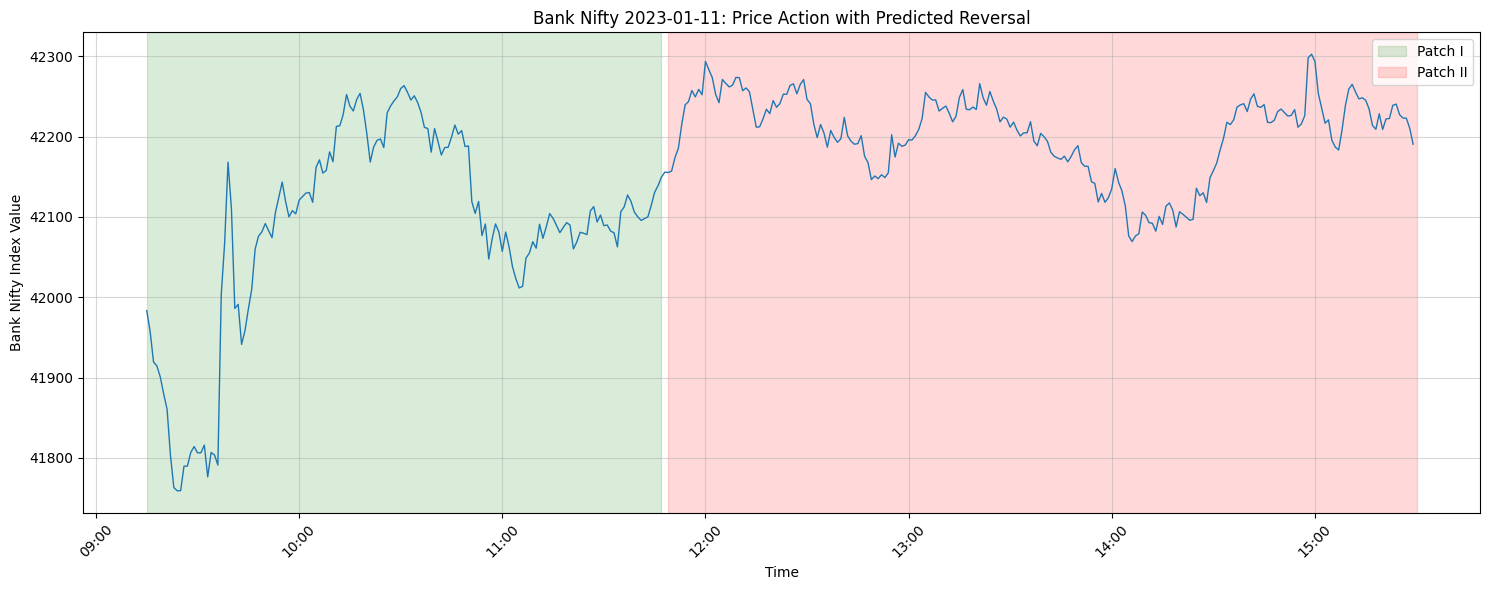

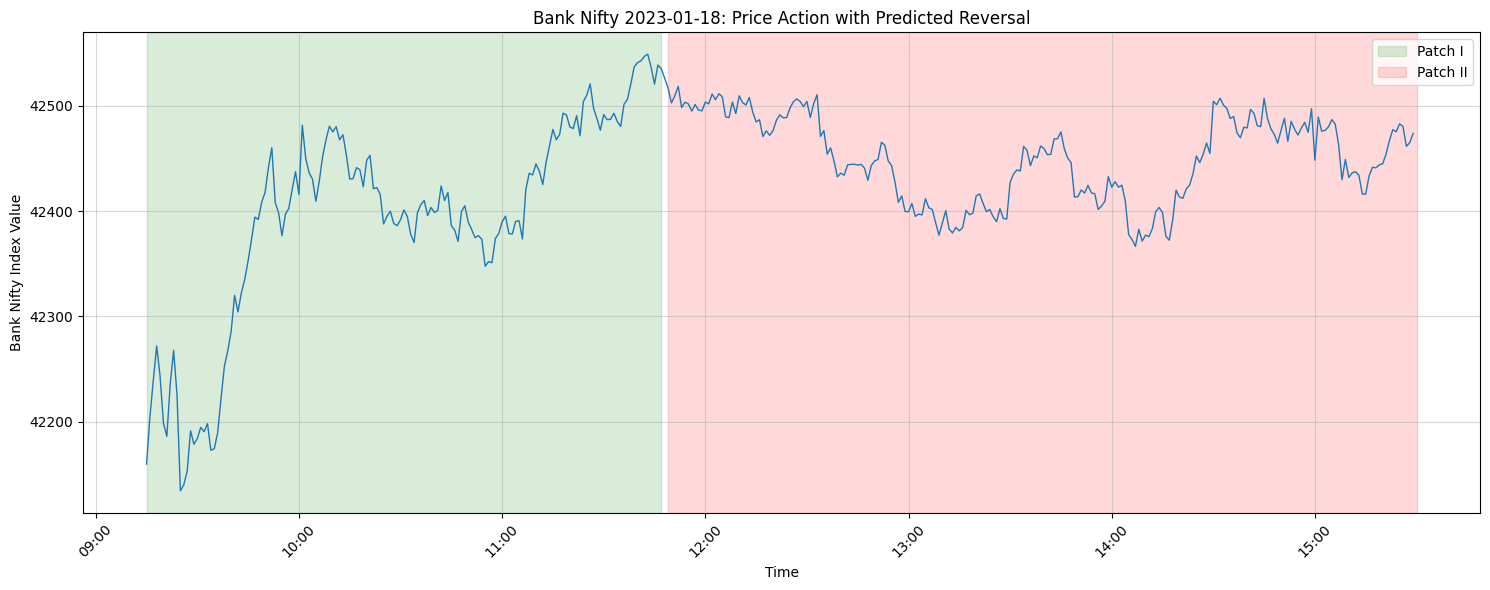

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

# Load and prepare the dataset
file_path = '/content/bank-nifty-1m-data.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.lower()
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
df.set_index('datetime', inplace=True)

# Define the 10 Intra-day Index Manipulation dates from SEBI report
intra_day_dates = ['31/08/2023', '13/09/2023', '20/09/2023', '28/09/2023', '18/10/2023',
                   '26/10/2023', '06/12/2023', '03/01/2024', '17/01/2024', '06/03/2024']
intra_day_dates = [pd.to_datetime(d, format='%d/%m/%Y').date() for d in intra_day_dates]

# Filter data for the 10 dates
df_intra = df[df.index.to_series().apply(lambda x: x.date()).isin(intra_day_dates)]

# Function to analyze each day
def analyze_day(day_data):
    patch_i_end = day_data.loc[day_data.index.strftime('%H:%M:%S') == '11:46:00', 'close'].iloc[0] if not day_data.loc[day_data.index.strftime('%H:%M:%S') == '11:46:00'].empty else np.nan
    patch_ii_start = day_data.loc[day_data.index.strftime('%H:%M:%S') == '11:49:00', 'close'].iloc[0] if not day_data.loc[day_data.index.strftime('%H:%M:%S') == '11:49:00'].empty else np.nan
    patch_ii_close = day_data.loc[day_data.index.strftime('%H:%M:%S') == '15:30:00', 'close'].iloc[0] if not day_data.loc[day_data.index.strftime('%H:%M:%S') == '15:30:00'].empty else np.nan

    change_i_to_ii = ((patch_ii_start - patch_i_end) / patch_i_end * 100) if pd.notna(patch_i_end) and pd.notna(patch_ii_start) else np.nan
    change_ii_to_close = ((patch_ii_close - patch_ii_start) / patch_ii_start * 100) if pd.notna(patch_ii_start) and pd.notna(patch_ii_close) else np.nan

    patch_i_data = day_data.between_time('09:15:00', '11:47:00')
    patch_ii_data = day_data.between_time('11:49:00', '15:30:00')
    vol_patch_i = patch_i_data['close'].pct_change().std() * np.sqrt(252) if not patch_i_data.empty else np.nan
    vol_patch_ii = patch_ii_data['close'].pct_change().std() * np.sqrt(252) if not patch_ii_data.empty else np.nan

    return {
        'date': day_data.index[0].date(),
        'patch_i_end': patch_i_end,
        'patch_ii_start': patch_ii_start,
        'patch_ii_close': patch_ii_close,
        'change_i_to_ii (%)': change_i_to_ii,
        'change_ii_to_close (%)': change_ii_to_close,
        'vol_patch_i': vol_patch_i,
        'vol_patch_ii': vol_patch_ii
    }

# Analyze all 10 days
results = []
for date in intra_day_dates:
    day_data = df_intra[df_intra.index.date == date]
    if not day_data.empty:
        result = analyze_day(day_data)
        results.append(result)

results_df = pd.DataFrame(results)
print("Analysis Results:")
print(results_df)

# Define reversal criterion
def is_reversal(row):
    return (row['change_i_to_ii (%)'] > 0.5 and
            row['change_ii_to_close (%)'] < -0.5 and
            row['vol_patch_ii'] > 1.5 * row['vol_patch_i'])

results_df['reversal_predicted'] = results_df.apply(is_reversal, axis=1)

# Visualize for each day
for index, row in results_df.iterrows():
    date = row['date']
    day_data = df_intra[df_intra.index.date == date]

    plt.figure(figsize=(15, 6))
    plt.plot(day_data.index, day_data['close'], color='tab:blue', linewidth=1)
    plt.title(f'Bank Nifty {date}: Price Action with Patches')
    plt.xlabel('Time')
    plt.ylabel('Bank Nifty Index Value')
    plt.grid(True, alpha=0.5)

    plt.axvspan(pd.to_datetime(f'{date} 09:15'), pd.to_datetime(f'{date} 11:47'), color='green', alpha=0.15, label='Patch I: Aggressive Buying')
    plt.axvspan(pd.to_datetime(f'{date} 11:49'), pd.to_datetime(f'{date} 15:30'), color='red', alpha=0.15, label='Patch II: Aggressive Selling')
    if row['reversal_predicted']:
        plt.axvline(pd.to_datetime(f'{date} 11:49'), color='orange', linestyle='--', linewidth=1.5, label='Predicted Reversal')

    plt.legend(loc='upper right')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Test model on other expiry days (corrected)
def find_expiry_days(df, start_date='2023-01-01', end_date='2024-03-22'):
    # Filter Wednesdays and convert to dates
    wednesdays = df.index[df.index.weekday == 2]
    expiry_dates = pd.Series(wednesdays).dt.date.unique()
    return [d for d in expiry_dates if pd.to_datetime(start_date) <= pd.to_datetime(d) <= pd.to_datetime(end_date) and d not in intra_day_dates]

other_expiry_days = find_expiry_days(df)
for date in other_expiry_days[:3]:  # Limit to first 3 for brevity
    test_day = df[df.index.date == date]
    test_result = analyze_day(test_day)
    test_df = pd.DataFrame([test_result])
    test_df['reversal_predicted'] = test_df.apply(is_reversal, axis=1)

    plt.figure(figsize=(15, 6))
    plt.plot(test_day.index, test_day['close'], color='tab:blue', linewidth=1)
    plt.title(f'Bank Nifty {date}: Price Action with Predicted Reversal')
    plt.xlabel('Time')
    plt.ylabel('Bank Nifty Index Value')
    plt.grid(True, alpha=0.5)

    plt.axvspan(pd.to_datetime(f'{date} 09:15'), pd.to_datetime(f'{date} 11:47'), color='green', alpha=0.15, label='Patch I')
    plt.axvspan(pd.to_datetime(f'{date} 11:49'), pd.to_datetime(f'{date} 15:30'), color='red', alpha=0.15, label='Patch II')
    if test_df['reversal_predicted'].iloc[0]:
        plt.axvline(pd.to_datetime(f'{date} 11:49'), color='orange', linestyle='--', linewidth=1.5, label='Predicted Reversal')

    plt.legend(loc='upper right')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Load and prepare the dataset (assuming df_filtered is pre-loaded as in your code)
file_path = '/content/bank-nifty-1m-data.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.lower()
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
df.set_index('datetime', inplace=True)
df_filtered = df.loc['2023-01-01':'2024-03-22']  # Match your filtered range

def calculate_features(day_data):
    if day_data.empty:
        return pd.Series({'Jump_Open': np.nan, 'Patch1_Change': np.nan, 'Patch2_Change': np.nan, 'Reversal_Ratio': np.nan})

    day_str = day_data.index.date[0].strftime('%Y-%m-%d')

    open_price = day_data['open'].iloc[0]

    patch1_start_time = day_str + ' 09:15'
    patch1_end_time = day_str + ' 11:47'
    patch2_start_time = day_str + ' 11:49'
    patch2_end_time = day_str + ' 15:30'  # Use last available if 15:30 missing

    jump_open_max_high = day_data.loc[day_str + ' 09:15':day_str + ' 09:30']['high'].max()
    jump_open = (jump_open_max_high / open_price) - 1

    patch1_data = day_data.loc[patch1_start_time:patch1_end_time]
    patch2_data = day_data.loc[patch2_start_time:patch2_end_time]

    if not patch1_data.empty:
        patch1_start = patch1_data['open'].iloc[0]
        patch1_end = patch1_data['close'].iloc[-1] if not patch1_data.empty else np.nan
        patch1_change = patch1_end - patch1_start if pd.notna(patch1_end) else np.nan
    else:
        patch1_change = np.nan

    if not patch2_data.empty:
        patch2_start = patch2_data['open'].iloc[0]
        patch2_end = patch2_data['close'].iloc[-1] if not patch2_data.empty else np.nan
        patch2_change = patch2_end - patch2_start if pd.notna(patch2_end) else np.nan
    else:
        patch2_change = np.nan

    if patch1_change != 0 and not np.isnan(patch1_change):
        reversal_ratio = - (patch2_change / patch1_change)
    else:
        reversal_ratio = np.nan

    return pd.Series({
        'Jump_Open': jump_open,
        'Patch1_Change': patch1_change,
        'Patch2_Change': patch2_change,
        'Reversal_Ratio': reversal_ratio
    })

daily_features = df_filtered.groupby(df_filtered.index.date).apply(calculate_features)
daily_features.index = pd.to_datetime(daily_features.index)
daily_features.rename_axis('Date', inplace=True)

# Define SEBI manipulation dates (10 Intra-day + 1 Extended)
manipulation_dates = ['2023-08-31', '2023-09-13', '2023-09-20', '2023-09-28', '2023-10-04',
                     '2023-10-18', '2023-10-26', '2023-12-06', '2024-01-03', '2024-01-17', '2024-03-06']
manipulation_dates = pd.to_datetime(manipulation_dates)

# No automatic Y_Target = 0; we'll predict instead
print("Shape of Feature DataFrame:", daily_features.shape)
print("\nDescriptive Statistics for All Days:")
print(daily_features.describe())
print("\nFirst 10 Rows of Feature DataFrame:")
print(daily_features.head(10))

Shape of Feature DataFrame: (305, 4)

Descriptive Statistics for All Days:
        Jump_Open  Patch1_Change  Patch2_Change  Reversal_Ratio
count  304.000000     304.000000     304.000000      304.000000
mean     0.001794     -35.671546       4.745395        0.226695
std      0.002220     228.534888     233.150766       10.241148
min      0.000000   -1149.350000    -854.700000     -139.491803
25%      0.000367    -159.825000    -113.312500       -0.708169
50%      0.001209     -33.375000       2.475000        0.084737
75%      0.002350      97.550000     136.725000        1.158934
max      0.021494     807.450000     744.600000       48.954315

First 10 Rows of Feature DataFrame:
            Jump_Open  Patch1_Change  Patch2_Change  Reversal_Ratio
Date                                                               
2023-01-02   0.002626         228.95         -36.25        0.158332
2023-01-03   0.004648         214.00          87.30       -0.407944
2023-01-04   0.003682        -294.20    

--- Model Evaluation on Training Split ---
Accuracy Score: 0.5869565217391305

Confusion Matrix (Test Set):
[[51 38]
 [ 0  3]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.57      0.73        89
         1.0       0.07      1.00      0.14         3

    accuracy                           0.59        92
   macro avg       0.54      0.79      0.43        92
weighted avg       0.97      0.59      0.71        92


Top 5 Predicted Manipulation Days (Outside SEBI Dates):
            Jump_Open  Patch1_Change  Patch2_Change  Reversal_Ratio
Date                                                               
2023-02-01   0.001437         169.20        -775.10        4.580969
2023-05-19   0.000492        -227.85         268.35        1.177749
2024-02-01   0.000182        -244.05         281.90        1.155091
2023-07-14   0.001258        -199.70         212.60        1.064597
2024-02-22   0.001907        -414.00         420.90      

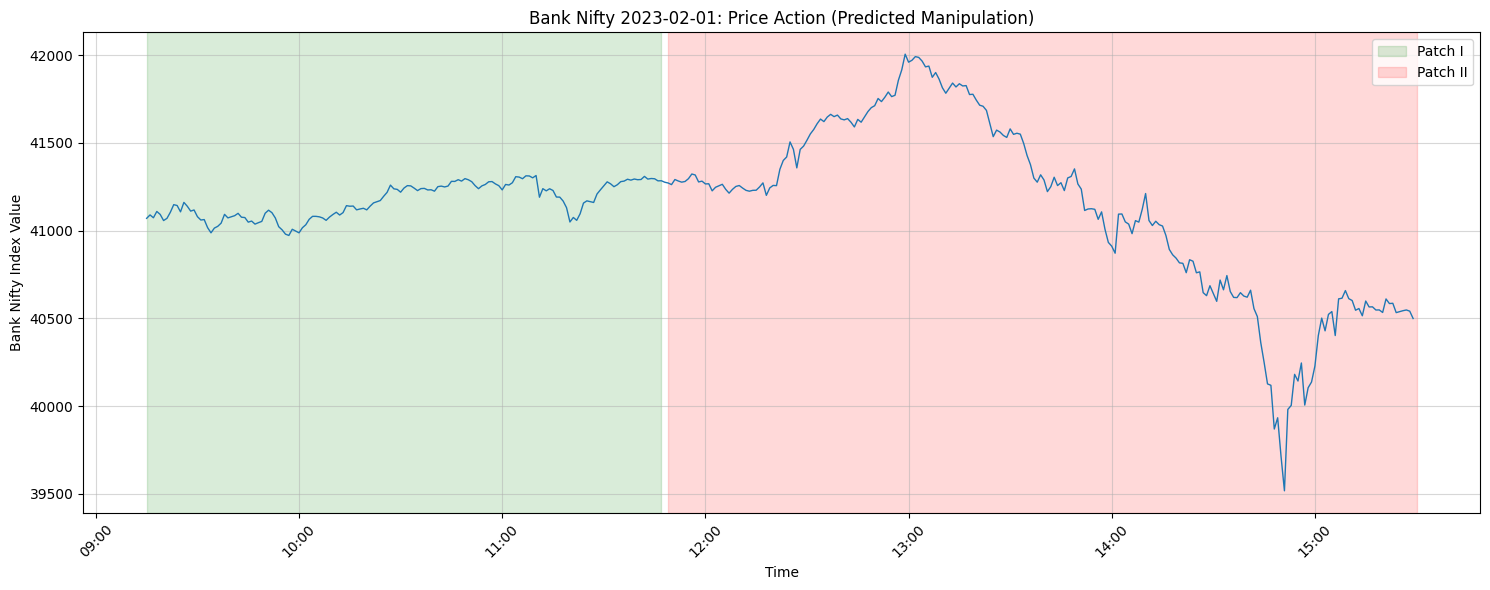

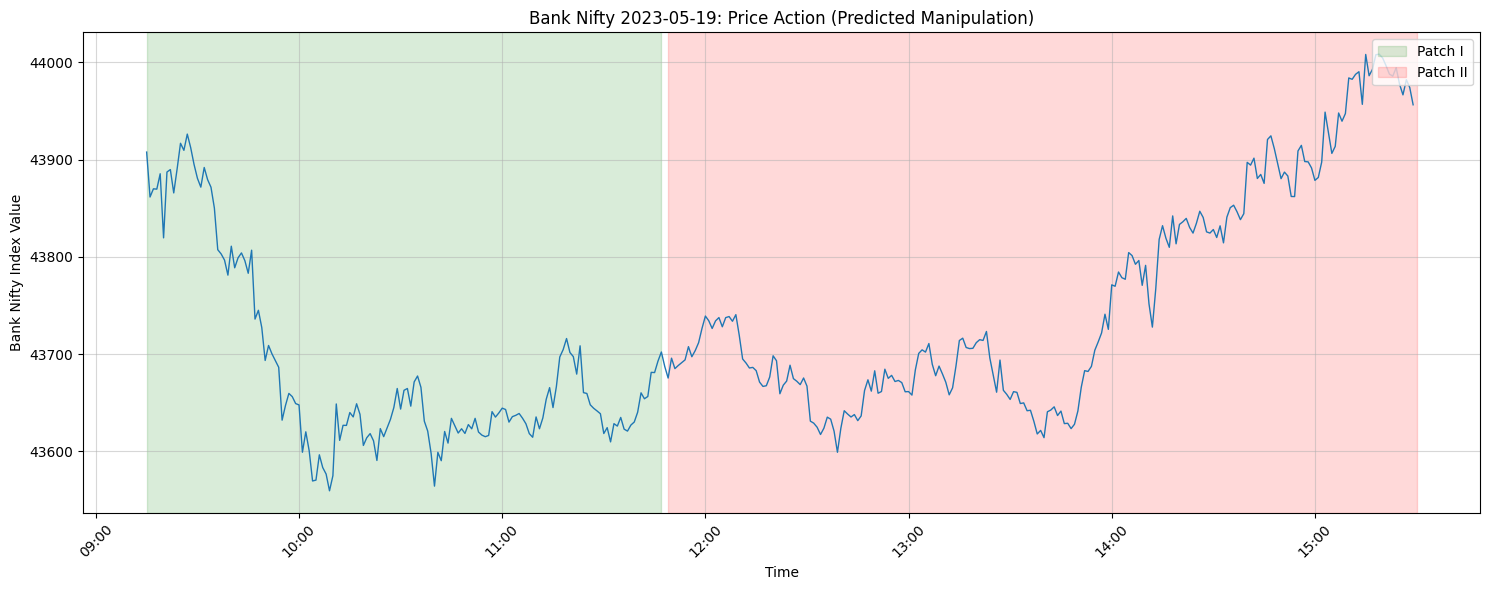

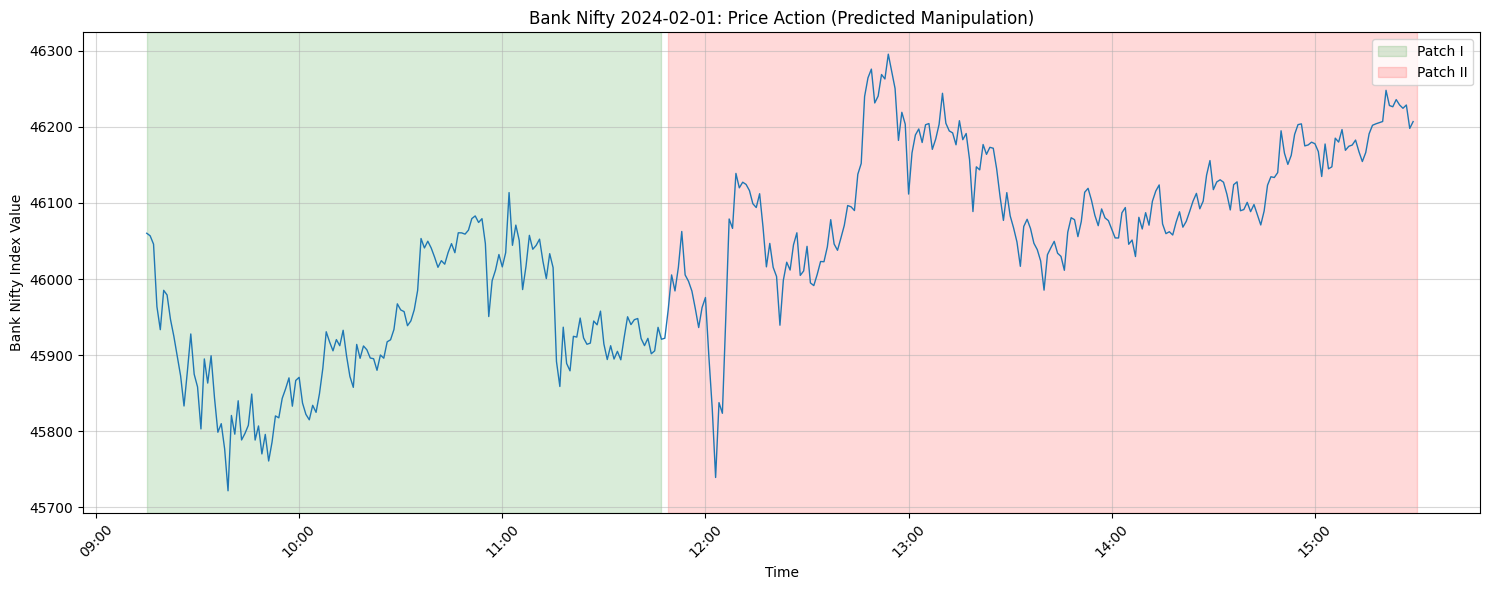

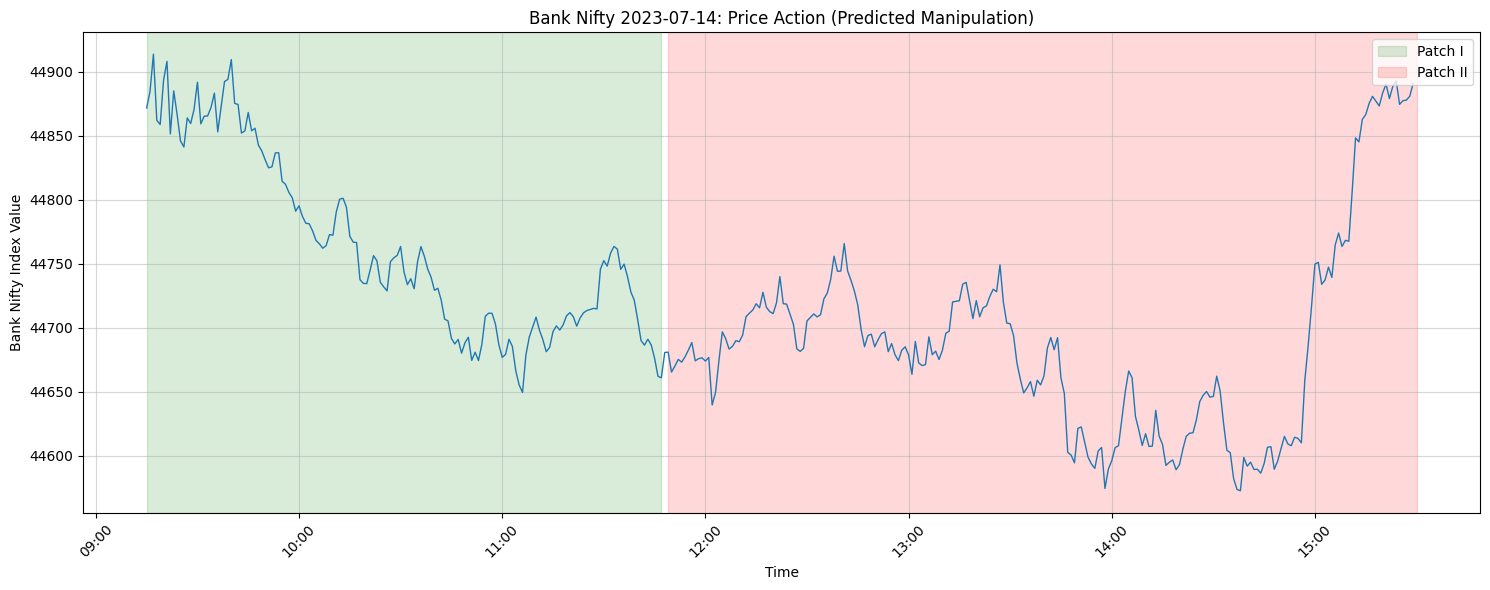

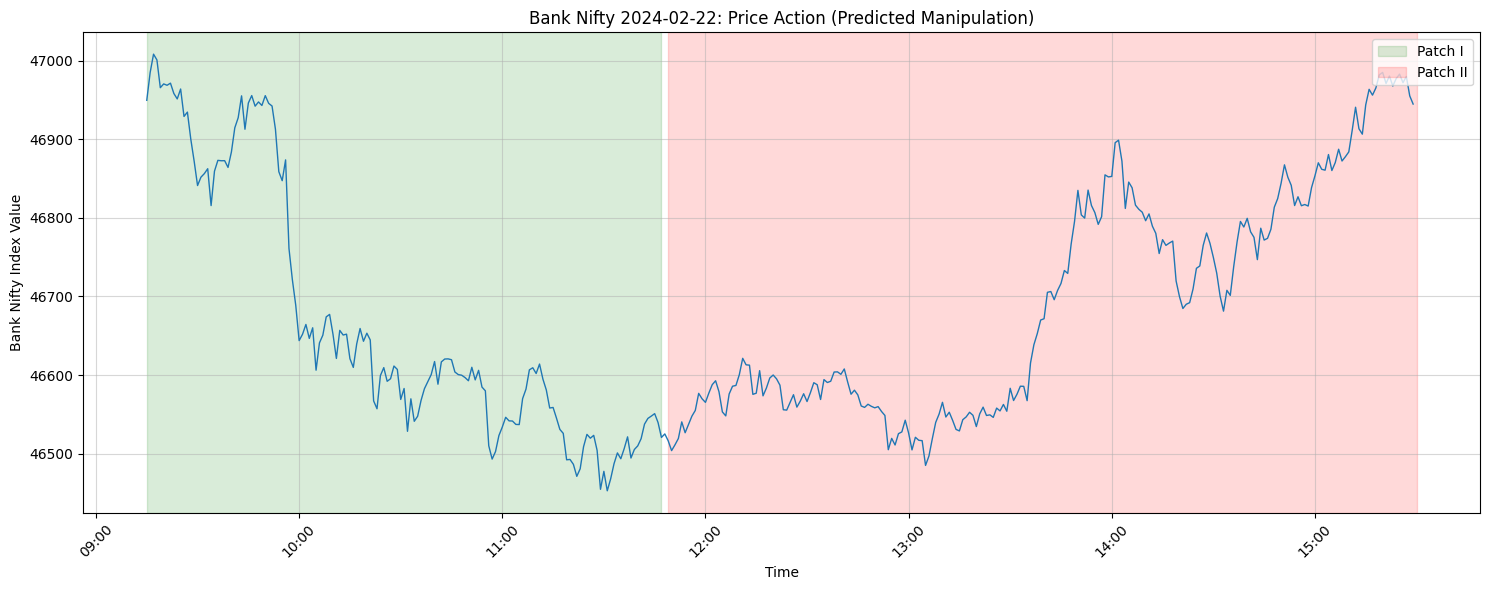

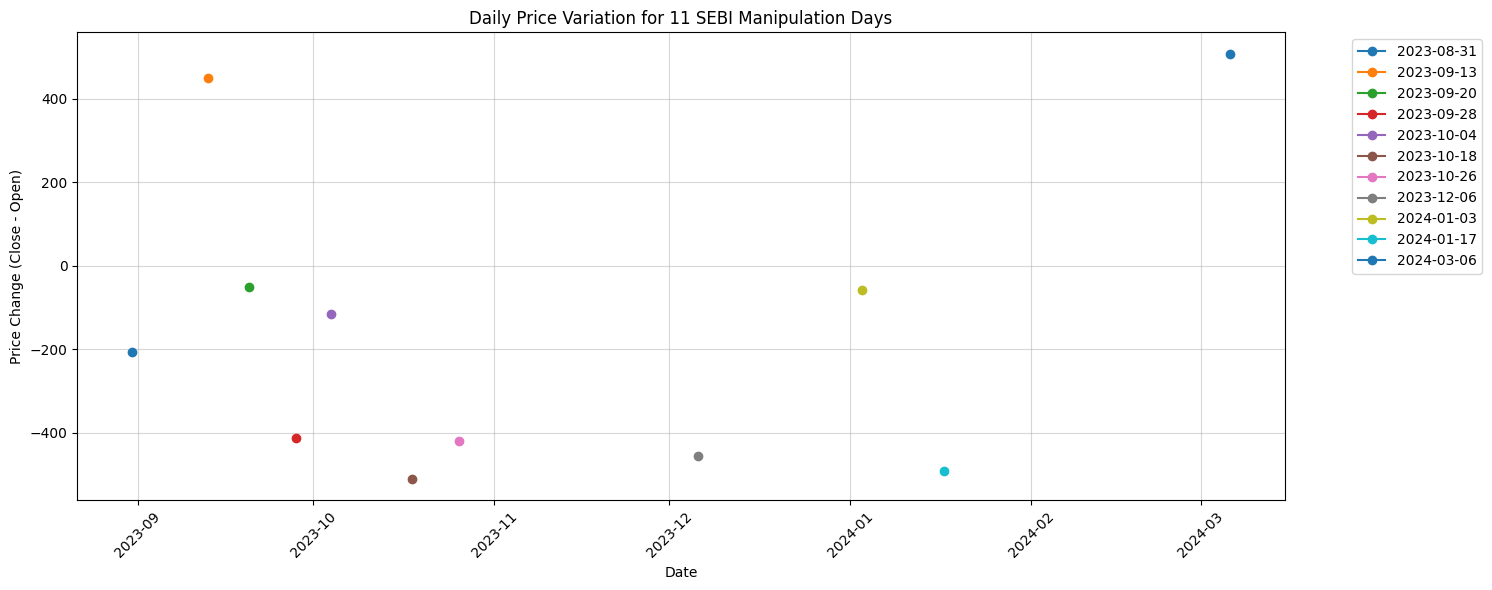

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load and prepare the dataset
file_path = '/content/bank-nifty-1m-data.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.lower()
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
df.set_index('datetime', inplace=True)

# Define SEBI manipulation dates (10 Intra-day + 1 Extended)
manipulation_dates = ['2023-08-31', '2023-09-13', '2023-09-20', '2023-09-28', '2023-10-04',
                     '2023-10-18', '2023-10-26', '2023-12-06', '2024-01-03', '2024-01-17', '2024-03-06']
manipulation_dates = pd.to_datetime(manipulation_dates)

# Filter data for feature calculation (assuming df_filtered logic)
df_filtered = df.loc['2023-01-01':'2024-03-22']

def calculate_features(day_data):
    if day_data.empty:
        return pd.Series({'Jump_Open': np.nan, 'Patch1_Change': np.nan, 'Patch2_Change': np.nan, 'Reversal_Ratio': np.nan})

    day_str = day_data.index.date[0].strftime('%Y-%m-%d')

    open_price = day_data['open'].iloc[0]

    patch1_start_time = day_str + ' 09:15'
    patch1_end_time = day_str + ' 11:47'
    patch2_start_time = day_str + ' 11:49'
    patch2_end_time = day_str + ' 15:30'

    jump_open_max_high = day_data.loc[day_str + ' 09:15':day_str + ' 09:30']['high'].max()
    jump_open = (jump_open_max_high / open_price) - 1

    patch1_data = day_data.loc[patch1_start_time:patch1_end_time]
    patch2_data = day_data.loc[patch2_start_time:patch2_end_time]

    if not patch1_data.empty:
        patch1_start = patch1_data['open'].iloc[0]
        patch1_end = patch1_data['close'].iloc[-1] if not patch1_data.empty else np.nan
        patch1_change = patch1_end - patch1_start if pd.notna(patch1_end) else np.nan
    else:
        patch1_change = np.nan

    if not patch2_data.empty:
        patch2_start = patch2_data['open'].iloc[0]
        patch2_end = patch2_data['close'].iloc[-1] if not patch2_data.empty else np.nan
        patch2_change = patch2_end - patch2_start if pd.notna(patch2_end) else np.nan
    else:
        patch2_change = np.nan

    if patch1_change != 0 and not np.isnan(patch1_change):
        reversal_ratio = - (patch2_change / patch1_change)
    else:
        reversal_ratio = np.nan

    return pd.Series({
        'Jump_Open': jump_open,
        'Patch1_Change': patch1_change,
        'Patch2_Change': patch2_change,
        'Reversal_Ratio': reversal_ratio
    })

daily_features = df_filtered.groupby(df_filtered.index.date).apply(calculate_features)
daily_features.index = pd.to_datetime(daily_features.index)
daily_features.rename_axis('Date', inplace=True)

# Model preparation
df_model = daily_features.dropna().copy()

X = df_model[['Jump_Open', 'Patch1_Change', 'Patch2_Change', 'Reversal_Ratio']]
y_train_known = np.zeros(len(df_model))
y_train_known[df_model.index.isin(manipulation_dates)] = 1

X_train, X_test, y_train, y_test = train_test_split(
    X, y_train_known, test_size=0.3, random_state=42, stratify=y_train_known
)

model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predict on all days
y_pred_all = model.predict(X)
df_model['Predicted_Manipulation'] = y_pred_all

# Identify top 5 predicted manipulation days outside SEBI dates
predicted_manip = df_model[df_model['Predicted_Manipulation'] == 1]
non_sebi_predicted = predicted_manip[~predicted_manip.index.isin(manipulation_dates)]
top_5_predicted = non_sebi_predicted.sort_values(by='Reversal_Ratio', ascending=False).head(5)

print("--- Model Evaluation on Training Split ---")
print("Accuracy Score:", accuracy_score(y_test, model.predict(X_test)))
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, model.predict(X_test)))
print("\nClassification Report:")
print(classification_report(y_test, model.predict(X_test), zero_division=0))
print("\nTop 5 Predicted Manipulation Days (Outside SEBI Dates):")
print(top_5_predicted[['Jump_Open', 'Patch1_Change', 'Patch2_Change', 'Reversal_Ratio']])

# Visualize top 5 predicted days
for date in top_5_predicted.index:
    day_data = df[df.index.date == date.date()]
    plt.figure(figsize=(15, 6))
    plt.plot(day_data.index, day_data['close'], color='tab:blue', linewidth=1)
    plt.title(f'Bank Nifty {date.date()}: Price Action (Predicted Manipulation)')
    plt.xlabel('Time')
    plt.ylabel('Bank Nifty Index Value')
    plt.grid(True, alpha=0.5)
    plt.axvspan(pd.to_datetime(f'{date.date()} 09:15'), pd.to_datetime(f'{date.date()} 11:47'), color='green', alpha=0.15, label='Patch I')
    plt.axvspan(pd.to_datetime(f'{date.date()} 11:49'), pd.to_datetime(f'{date.date()} 15:30'), color='red', alpha=0.15, label='Patch II')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# Plot price variation for all 11 SEBI days as individual lines
sebi_days_data = df[df.index.to_series().apply(lambda x: x.date()).isin([d.date() for d in manipulation_dates])]
daily_variations = {}
for date in manipulation_dates:
    day_data = sebi_days_data[sebi_days_data.index.date == date.date()]
    if not day_data.empty:
        open_price = day_data['open'].iloc[0]
        close_price = day_data['close'].iloc[-1]
        daily_variations[date.date()] = close_price - open_price

plt.figure(figsize=(15, 6))
for date, variation in daily_variations.items():
    plt.plot(date, variation, marker='o', linestyle='-', label=f'{date.strftime("%Y-%m-%d")}')
plt.title('Daily Price Variation for 11 SEBI Manipulation Days')
plt.xlabel('Date')
plt.ylabel('Price Change (Close - Open)')
plt.grid(True, alpha=0.5)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.show()

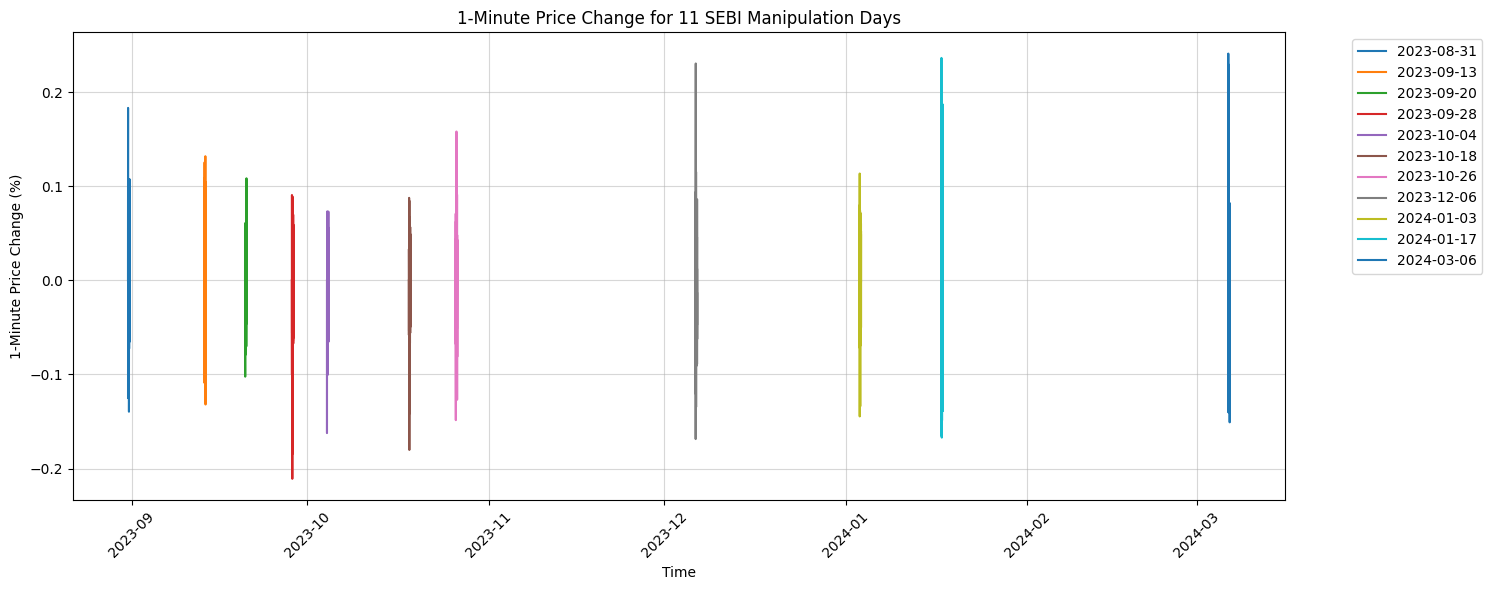

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load and prepare the dataset
file_path = '/content/bank-nifty-1m-data.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.lower()
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
df.set_index('datetime', inplace=True)

# Define the 11 SEBI manipulation dates (10 Intra-day + 1 Extended)
manipulation_dates = ['2023-08-31', '2023-09-13', '2023-09-20', '2023-09-28', '2023-10-04',
                     '2023-10-18', '2023-10-26', '2023-12-06', '2024-01-03', '2024-01-17', '2024-03-06']
manipulation_dates = pd.to_datetime(manipulation_dates)

# Filter data for the 11 days
sebi_days_data = df[df.index.to_series().apply(lambda x: x.date()).isin([d.date() for d in manipulation_dates])]

# Calculate 1-minute price change for each day
plt.figure(figsize=(15, 6))
for date in manipulation_dates:
    day_data = sebi_days_data[sebi_days_data.index.date == date.date()]
    if not day_data.empty:
        price_change = day_data['close'].pct_change().fillna(0) * 100  # Percentage change
        plt.plot(day_data.index, price_change, label=date.strftime('%Y-%m-%d'))

plt.title('1-Minute Price Change for 11 SEBI Manipulation Days')
plt.xlabel('Time')
plt.ylabel('1-Minute Price Change (%)')
plt.grid(True, alpha=0.5)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside
plt.tight_layout()
plt.show()

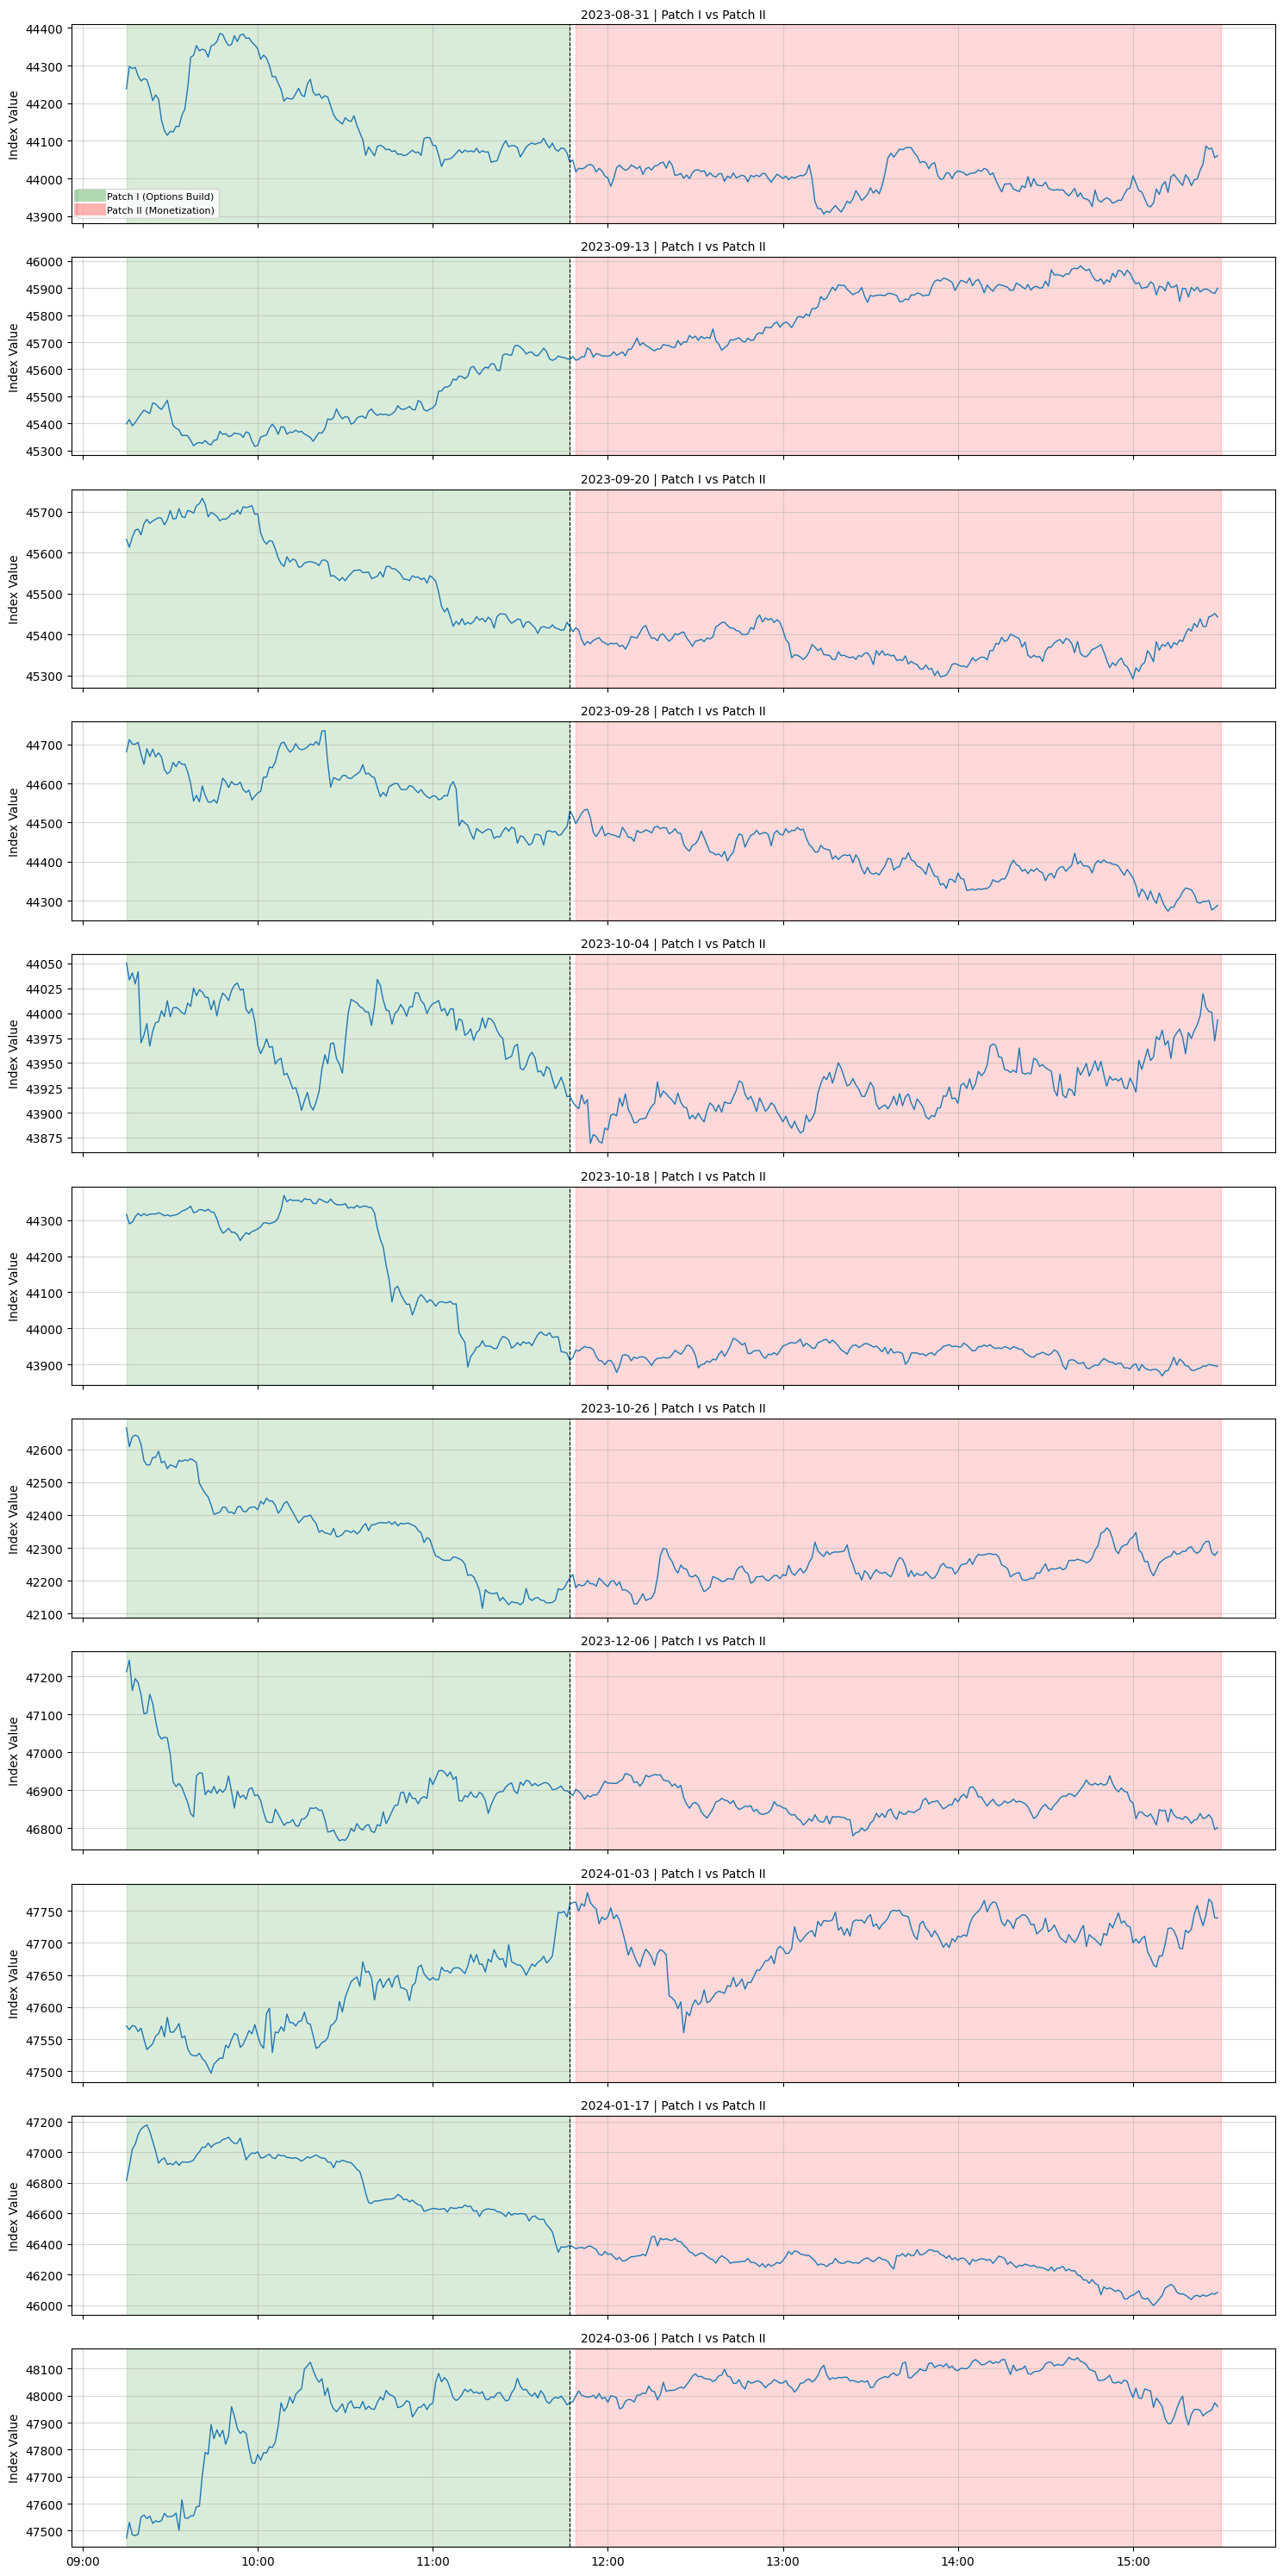

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

manipulation_dates_str = [
    '2023-08-31', '2023-09-13', '2023-09-20', '2023-09-28', '2023-10-04',
    '2023-10-18', '2023-10-26', '2023-12-06', '2024-01-03', '2024-01-17',
    '2024-03-06'
]

plt.figure(figsize=(15, 30))

for i, date_str in enumerate(manipulation_dates_str):
    date_dt = pd.to_datetime(date_str)

    day_data = df_filtered.loc[date_str]

    ax = plt.subplot(11, 1, i + 1)

    ax.plot(day_data.index, day_data['close'], linewidth=1)

    ax.axvspan(pd.to_datetime(f'{date_str} 09:15'), pd.to_datetime(f'{date_str} 11:47'), color='green', alpha=0.15)
    ax.axvspan(pd.to_datetime(f'{date_str} 11:49'), pd.to_datetime(f'{date_str} 15:30'), color='red', alpha=0.15)

    ax.axvline(pd.to_datetime(f'{date_str} 11:47'), color='black', linestyle='--', linewidth=0.8)

    ax.set_title(f'{date_str} | Patch I vs Patch II', fontsize=10)
    ax.set_ylabel('Index Value')
    ax.grid(True, alpha=0.5)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    if i < 10:
        plt.setp(ax.get_xticklabels(), visible=False)

    if i == 0:
        ax.plot([], [], color='green', alpha=0.3, linewidth=10, label='Patch I (Options Build)')
        ax.plot([], [], color='red', alpha=0.3, linewidth=10, label='Patch II (Monetization)')
        ax.legend(loc='lower left', fontsize=8)


plt.tight_layout()
plt.show()

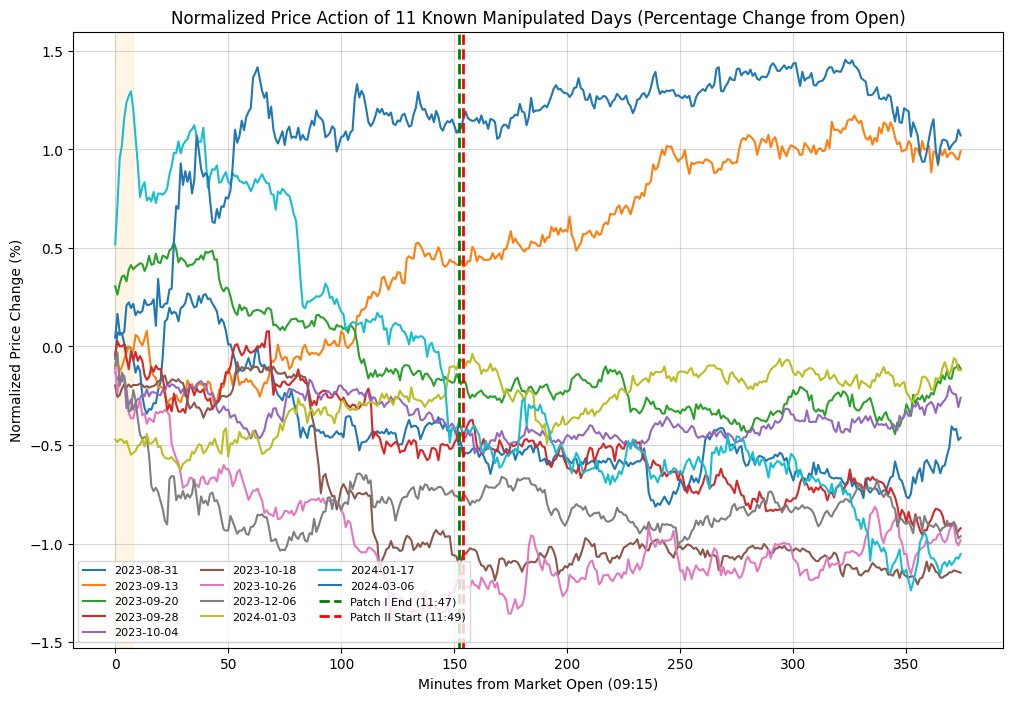

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

manipulation_dates_str = [
    '2023-08-31', '2023-09-13', '2023-09-20', '2023-09-28', '2023-10-04',
    '2023-10-18', '2023-10-26', '2023-12-06', '2024-01-03', '2024-01-17',
    '2024-03-06'
]

plt.figure(figsize=(12, 8))

for date_str in manipulation_dates_str:
    day_data = df_filtered.loc[date_str].copy()

    # Normalize Price to Percentage Change from Open
    open_price = day_data['open'].iloc[0]
    day_data['Normalized_Close'] = ((day_data['close'] / open_price) - 1) * 100

    # Standardize X-axis to Minutes from Open (0-375)
    day_data['Minutes'] = np.arange(len(day_data))

    plt.plot(day_data['Minutes'], day_data['Normalized_Close'], label=date_str, linewidth=1.5)

# Add markers for the Patches (11:47 is 152 minutes from 09:15)
plt.axvline(x=152, color='green', linestyle='--', linewidth=2, label='Patch I End (11:47)')
plt.axvline(x=154, color='red', linestyle='--', linewidth=2, label='Patch II Start (11:49)')

# Shade the critical Initial Spike window (09:15 to 09:23 = Minutes 0-8)
plt.axvspan(0, 8, color='orange', alpha=0.1)

plt.title('Normalized Price Action of 11 Known Manipulated Days (Percentage Change from Open)')
plt.xlabel('Minutes from Market Open (09:15)')
plt.ylabel('Normalized Price Change (%)')
plt.grid(True, alpha=0.5)
plt.legend(loc='lower left', ncol=3, fontsize=8)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

def calculate_features(day_data):
    if day_data.empty:
        return pd.Series({'Jump_Open': np.nan, 'Patch1_Change': np.nan, 'Patch2_Change': np.nan, 'Reversal_Ratio': np.nan})

    day_str = day_data.index.date[0].strftime('%Y-%m-%d')

    open_price = day_data['open'].iloc[0]

    patch1_start_time = day_str + ' 09:15'
    patch1_end_time = day_str + ' 11:47'
    patch2_start_time = day_str + ' 11:49'
    patch2_end_time = day_str + ' 15:30'

    jump_open_max_high = day_data.loc[day_str + ' 09:15':day_str + ' 09:30']['high'].max()
    jump_open = (jump_open_max_high / open_price) - 1

    patch1_data = day_data.loc[patch1_start_time:patch1_end_time]
    patch2_data = day_data.loc[patch2_start_time:patch2_end_time]

    if not patch1_data.empty:
        patch1_start = patch1_data['open'].iloc[0]
        patch1_end = patch1_data['close'].iloc[-1]
        patch1_change = patch1_end - patch1_start
    else:
        patch1_change = np.nan

    if not patch2_data.empty:
        patch2_start = patch2_data['open'].iloc[0]
        patch2_end = patch2_data['close'].iloc[-1]
        patch2_change = patch2_end - patch2_start
    else:
        patch2_change = np.nan

    if patch1_change != 0 and not np.isnan(patch1_change):
        reversal_ratio = - (patch2_change / patch1_change)
    else:
        reversal_ratio = np.nan

    return pd.Series({
        'Jump_Open': jump_open,
        'Patch1_Change': patch1_change,
        'Patch2_Change': patch2_change,
        'Reversal_Ratio': reversal_ratio
    })

daily_features = df_filtered.groupby(df_filtered.index.date).apply(calculate_features)
daily_features.index = pd.to_datetime(daily_features.index)
daily_features.rename_axis('Date', inplace=True)

manipulation_dates = ['2023-08-31', '2023-09-13', '2023-09-20', '2023-09-28', '2023-10-04', '2023-10-18', '2023-10-26', '2023-12-06', '2024-01-03', '2024-01-17', '2024-03-06']
manipulation_dates = pd.to_datetime(manipulation_dates)

daily_features['Y_Target'] = 0
daily_features.loc[daily_features.index.isin(manipulation_dates), 'Y_Target'] = 1

print("Shape of Feature DataFrame:", daily_features.shape)
print("\nDescriptive Statistics for Features on Manipulated Days (Y=1):")
print(daily_features[daily_features['Y_Target'] == 1].describe())
print("\nFirst 10 Rows of Final DataFrame:")
print(daily_features.head(10))

Shape of Feature DataFrame: (305, 5)

Descriptive Statistics for Features on Manipulated Days (Y=1):
       Jump_Open  Patch1_Change  Patch2_Change  Reversal_Ratio  Y_Target
count  11.000000      11.000000      11.000000       11.000000      11.0
mean    0.002401    -138.813636     -20.727273       -0.369723       1.0
std     0.004018     296.136800     149.359992        0.755703       0.0
min     0.000051    -499.550000    -299.700000       -1.628362       1.0
25%     0.000185    -292.700000     -55.725000       -1.002979       1.0
50%     0.001112    -184.050000     -22.400000       -0.045487       1.0
75%     0.002240     -55.300000      55.850000        0.106415       1.0
max     0.013716     522.200000     247.400000        0.495623       1.0

First 10 Rows of Final DataFrame:
            Jump_Open  Patch1_Change  Patch2_Change  Reversal_Ratio  Y_Target
Date                                                                         
2023-01-02   0.002626         228.95         -36.25

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

# Assuming 'daily_features' is already defined from the previous step.

df_model = daily_features.dropna().copy()

X = df_model[['Jump_Open', 'Patch1_Change', 'Patch2_Change', 'Reversal_Ratio']]
y = df_model['Y_Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("--- Model Evaluation ---")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report (Focus on Precision/Recall):")
print(classification_report(y_test, y_pred, zero_division=0))

--- Model Evaluation ---
Accuracy Score: 0.5869565217391305

Confusion Matrix (Test Set):
[[51 38]
 [ 0  3]]

Classification Report (Focus on Precision/Recall):
              precision    recall  f1-score   support

           0       1.00      0.57      0.73        89
           1       0.07      1.00      0.14         3

    accuracy                           0.59        92
   macro avg       0.54      0.79      0.43        92
weighted avg       0.97      0.59      0.71        92



*we cannot prove that the days labeled $Y=0$ were genuinely "normal" and free from manipulation.
The model's features (e.g., Reversal_Ratio) are statistically strong enough to recognize a true manipulation event when presented with one.

True Positives (TP = 3): The model correctly identified all 3 of the known manipulated days present in your test set. This is the ultimate success in fraud detection.False Negatives (FN = 0): The model missed zero of the known manipulated days. This gives you a $100\%$ Recall for the minority class, which is exceptional.False Positives (FP = 38): The model incorrectly flagged 38 "Normal" days as manipulated*

*Precision (Y=1) $7\%$This is very low. Out of the 41 days the model flagged as fraud ($3+38$), only 3 were truly known manipulation days. This high number of False Positives directly relates to the concern about $Y=0$ days.*

*We have strong evidence (the 38 False Positives) supporting our hypothesis that the manipulation pattern occurs on days outside the SEBI's scope. The 38 False Positives are your primary analytical result.*

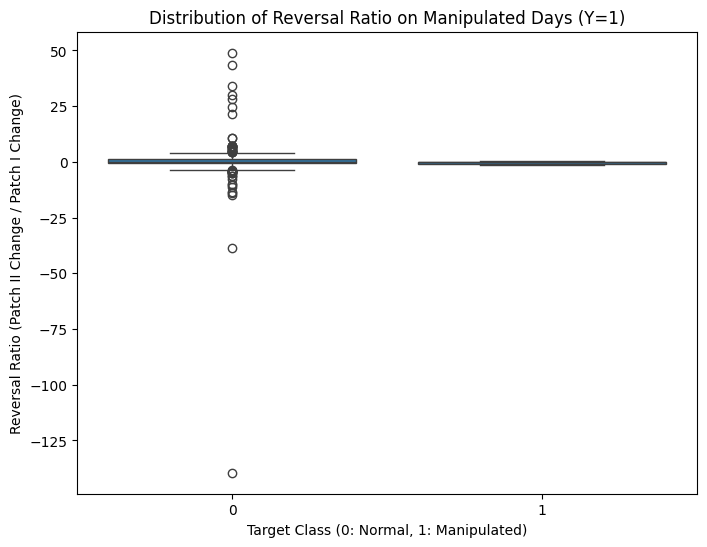

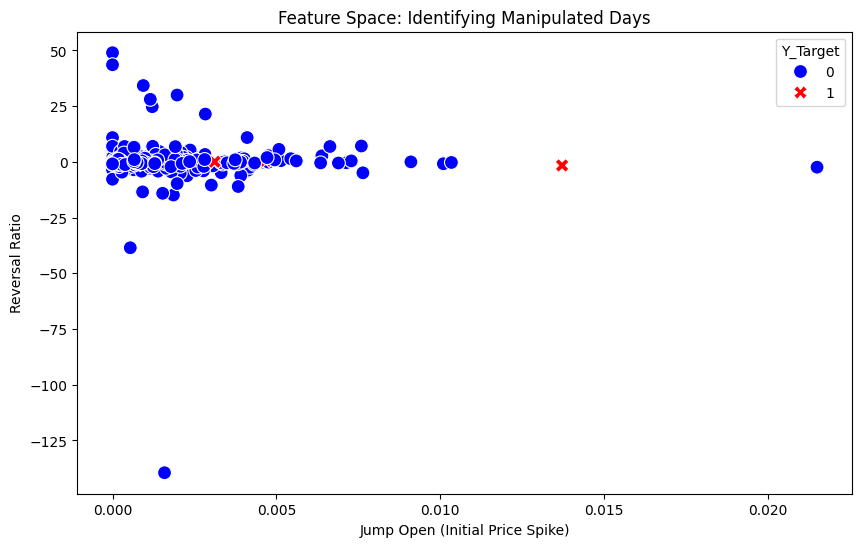

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'daily_features' is defined and loaded.
df_model = daily_features.dropna().copy()

# Plot 1: Box Plot for Reversal_Ratio by Target Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Y_Target', y='Reversal_Ratio', data=df_model)
plt.title('Distribution of Reversal Ratio on Manipulated Days (Y=1)')
plt.xlabel('Target Class (0: Normal, 1: Manipulated)')
plt.ylabel('Reversal Ratio (Patch II Change / Patch I Change)')
plt.show()

# Plot 2: Scatter Plot of two Key Features, colored by Target Class
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Jump_Open', y='Reversal_Ratio', hue='Y_Target', data=df_model, style='Y_Target', palette={0: 'blue', 1: 'red'}, markers={0: 'o', 1: 'X'}, s=100)
plt.title('Feature Space: Identifying Manipulated Days')
plt.xlabel('Jump Open (Initial Price Spike)')
plt.ylabel('Reversal Ratio')
plt.show()

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 14.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from arch import arch_model

# --- 1. DATA LOADING, FILTERING, AND PREPARATION ---
file_path = '/content/bank-nifty-1m-data.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.lower()
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
df.set_index('datetime', inplace=True)

df_filtered = df.loc['2023-01-01':'2024-03-22']

# --- 2. FEATURE ENGINEERING (CREATES daily_features and Y_Target) ---

def calculate_features(day_data):
    if day_data.empty:
        return pd.Series({'Jump_Open': np.nan, 'Patch1_Change': np.nan, 'Patch2_Change': np.nan, 'Reversal_Ratio': np.nan})

    day_str = day_data.index.date[0].strftime('%Y-%m-%d')
    open_price = day_data['open'].iloc[0]

    patch1_start_time = day_str + ' 09:15'
    patch1_end_time = day_str + ' 11:47'
    patch2_start_time = day_str + ' 11:49'
    patch2_end_time = day_str + ' 15:30'

    jump_open_max_high = day_data.loc[day_str + ' 09:15':day_str + ' 09:30']['high'].max()
    jump_open = (jump_open_max_high / open_price) - 1

    patch1_data = day_data.loc[patch1_start_time:patch1_end_time]

    if not patch1_data.empty:
        patch1_start = patch1_data['open'].iloc[0]
        patch1_end = patch1_data['close'].iloc[-1]
        patch1_change = patch1_end - patch1_start
    else:
        patch1_change = np.nan

    patch2_data = day_data.loc[patch2_start_time:patch2_end_time]

    if not patch2_data.empty:
        patch2_start = patch2_data['open'].iloc[0]
        patch2_end = patch2_data['close'].iloc[-1]
        patch2_change = patch2_end - patch2_start
    else:
        patch2_change = np.nan

    if patch1_change != 0 and not np.isnan(patch1_change):
        reversal_ratio = - (patch2_change / patch1_change)
    else:
        reversal_ratio = np.nan

    return pd.Series({'Jump_Open': jump_open, 'Patch1_Change': patch1_change, 'Patch2_Change': patch2_change, 'Reversal_Ratio': reversal_ratio})

daily_features = df_filtered.groupby(df_filtered.index.date).apply(calculate_features)
daily_features.index = pd.to_datetime(daily_features.index)
daily_features.rename_axis('Date', inplace=True)

manipulation_dates = ['2023-08-31', '2023-09-13', '2023-09-20', '2023-09-28', '2023-10-04', '2023-10-18', '2023-10-26', '2023-12-06', '2024-01-03', '2024-01-17', '2024-03-06']
manipulation_dates = pd.to_datetime(manipulation_dates)

daily_features['Y_Target'] = 0
daily_features.loc[daily_features.index.isin(manipulation_dates), 'Y_Target'] = 1


# --- 3. FIXED GARCH(1,1) ECONOMETRIC ANALYSIS ---
daily_close_data = df_filtered['close'].resample('D').last().dropna()
returns = np.log(daily_close_data / daily_close_data.shift(1)).dropna()
returns = returns.rename('Log_Return')

returns_df = returns.to_frame()
returns_df = returns_df.merge(daily_features[['Y_Target']], left_index=True, right_index=True, how='inner')
returns_df = returns_df.dropna()

garch_model = arch_model(returns_df['Log_Return'], vol='Garch', p=1, q=1, mean='Zero', rescale=True)
garch_fit = garch_model.fit(disp='off')

returns_df['Std_Residual'] = garch_fit.resid / garch_fit.conditional_volatility

Z_THRESHOLD = 3.5
returns_df['GARCH_Anomaly_Flag'] = (np.abs(returns_df['Std_Residual']) >= Z_THRESHOLD).astype(int)

print("--- GARCH(1,1) Econometric Volatility Analysis ---")
print(f"Standardized Residual Anomaly Threshold: {Z_THRESHOLD} Sigma")
print(f"Total Anomalous Days Flagged: {returns_df['GARCH_Anomaly_Flag'].sum()}")

print("\nTop 15 Days by GARCH Standardized Residual (Anomalous Events):")
print(returns_df.sort_values(by='Std_Residual', ascending=False).head(15)[['Y_Target', 'Std_Residual', 'GARCH_Anomaly_Flag']])

--- GARCH(1,1) Econometric Volatility Analysis ---
Standardized Residual Anomaly Threshold: 3.5 Sigma
Total Anomalous Days Flagged: 3

Top 15 Days by GARCH Standardized Residual (Anomalous Events):
            Y_Target  Std_Residual  GARCH_Anomaly_Flag
2023-12-04         0      4.615424                   1
2023-03-03         0      2.507648                   0
2024-03-01         0      2.323069                   0
2023-02-03         0      1.944538                   0
2023-11-29         0      1.901370                   0
2023-07-17         0      1.810772                   0
2023-05-08         0      1.730844                   0
2023-08-23         0      1.623045                   0
2023-04-11         0      1.621439                   0
2023-03-31         0      1.619358                   0
2023-10-27         0      1.604418                   0
2023-12-14         0      1.571286                   0
2023-12-21         0      1.561580                   0
2023-06-27         0      1.5356

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# --- NOTE: df_filtered, daily_features (from previous cells) MUST EXIST ---

# Prepare Data (Ensuring data is clean and features exist)
df_model = daily_features.dropna().copy()
X_features = df_model[['Jump_Open', 'Patch1_Change', 'Patch2_Change', 'Reversal_Ratio']]

# FIX: Re-assign Y_Target explicitly before using df_model downstream
manipulation_dates = ['2023-08-31', '2023-09-13', '2023-09-20', '2023-09-28', '2023-10-04', '2023-10-18', '2023-10-26', '2023-12-06', '2024-01-03', '2024-01-17', '2024-03-06']
manipulation_dates = pd.to_datetime(manipulation_dates)
df_model['Y_Target'] = 0
df_model.loc[df_model.index.isin(manipulation_dates), 'Y_Target'] = 1

# Scale data for better performance across different feature magnitudes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# 1. Train Isolation Forest
model_if = IsolationForest(contamination='auto', random_state=42)
model_if.fit(X_scaled)

# 2. Predict and Score
df_model['Anomaly_Score'] = model_if.decision_function(X_scaled)
df_model['Anomaly_Flag'] = model_if.predict(X_scaled)

# 3. Display Final Ranking
df_final_ranking = df_model.sort_values(by='Anomaly_Score', ascending=True).head(20)

print("--- FINAL UNSUPERVISED ANOMALY RANKING ---")
print("These days are structurally the furthest from the norm (Lowest Anomaly Score).")
print(df_final_ranking[['Y_Target', 'Anomaly_Score', 'Jump_Open', 'Reversal_Ratio']])

--- FINAL UNSUPERVISED ANOMALY RANKING ---
These days are structurally the furthest from the norm (Lowest Anomaly Score).
            Y_Target  Anomaly_Score  Jump_Open  Reversal_Ratio
Date                                                          
2024-02-29         0      -0.189249   0.001587     -139.491803
2023-01-30         0      -0.162808   0.021494       -2.397671
2024-01-17         1      -0.108204   0.013716       -1.628362
2024-02-02         0      -0.106378   0.002822        3.311507
2023-04-13         0      -0.101904   0.000000       48.954315
2023-03-13         0      -0.093113   0.007639       -4.931929
2024-03-01         0      -0.089683   0.006891       -0.532597
2024-01-23         0      -0.074670   0.001825       -0.315744
2023-05-05         0      -0.068918   0.007592        7.103276
2023-06-27         0      -0.062067   0.000000       43.556213
2023-02-03         0      -0.058939   0.006387        2.677168
2023-02-02         0      -0.050349   0.010093       -0.859

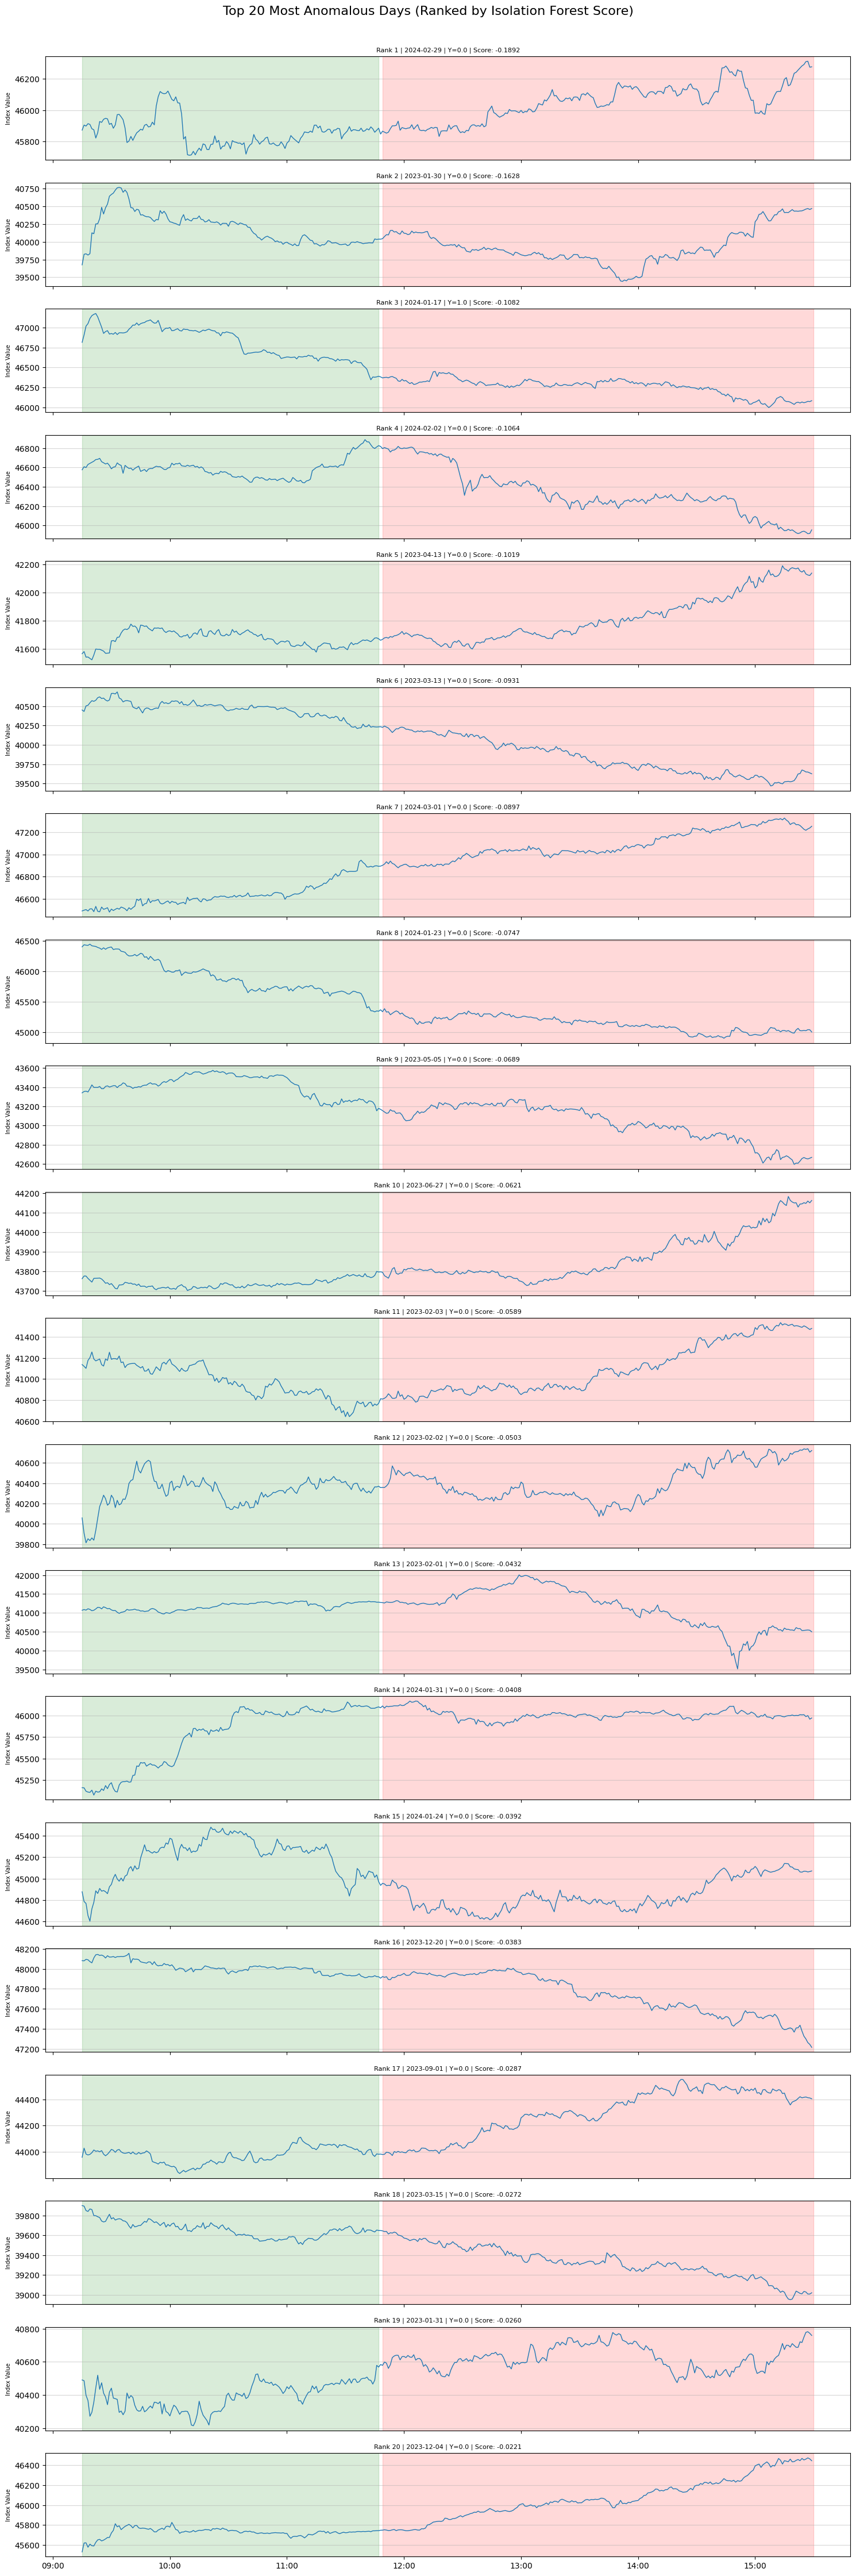

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

top_20_dates = df_final_ranking.index.to_list()

plt.figure(figsize=(15, 45))

for i, date_dt in enumerate(top_20_dates):
    date_str = date_dt.strftime('%Y-%m-%d')

    # Assume df_filtered is available and loaded correctly
    day_data = df_filtered.loc[date_str].copy()

    ax = plt.subplot(20, 1, i + 1)

    ax.plot(day_data.index, day_data['close'], linewidth=1)

    # Add Patches
    ax.axvspan(pd.to_datetime(f'{date_str} 09:15'), pd.to_datetime(f'{date_str} 11:47'), color='green', alpha=0.15)
    ax.axvspan(pd.to_datetime(f'{date_str} 11:49'), pd.to_datetime(f'{date_str} 15:30'), color='red', alpha=0.15)

    # Fetch scores for the title
    scores = df_final_ranking.loc[date_dt]
    y_target = scores['Y_Target']
    anomaly_score = scores['Anomaly_Score']

    ax.set_title(f'Rank {i+1} | {date_str} | Y={y_target} | Score: {anomaly_score:.4f}', fontsize=8)
    ax.set_ylabel('Index Value', fontsize=7)
    ax.grid(True, axis='y', alpha=0.5)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    if i < 19:
        plt.setp(ax.get_xticklabels(), visible=False)

plt.suptitle('Top 20 Most Anomalous Days (Ranked by Isolation Forest Score)', fontsize=16, y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()